<a href="https://colab.research.google.com/github/sabrinatiarab/Cakra_Data-Science-Challenge-Memprediksi-Kualitas-Jeruk-Berdasarkan-Dataset/blob/main/Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **A. Data Preprocessing**

##**1. Import Data and Library**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as pyplot
import statsmodels.api as sm
import statsmodels.formula.api as sm

from sklearn import svm, datasets, linear_model
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, auc, f1_score, precision_recall_fscore_support, roc_auc_score
from sklearn.svm import SVC
from sklearn.preprocessing import MaxAbsScaler, MinMaxScaler, Normalizer, StandardScaler, RobustScaler
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, cross_val_predict
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE, ADASYN, RandomOverSampler
from imblearn.combine import SMOTETomek, SMOTEENN
from imblearn.under_sampling import NearMiss, RandomUnderSampler
from collections import Counter
from numpy import where
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer
from sklearn.ensemble import RandomForestClassifier
from statsmodels.genmod.generalized_linear_model import GLM
from statsmodels.genmod import families
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import skew, kurtosis

In [ ]:
df = pd.read_excel('/content/Fix Data.xlsx', sheet_name='Fix (2)')
df

,Kode,Distress,Ind Komisaris,Total Komisaris,Total Direktur,Dualitas CEO,Afiliasi CEO,Akuntan Publik,Big Four,Audit Internal,Komite Audit,BlOw > 5%,Kepemilikan Keluarga,Kepemilikan Asing,Total Shareholder,Kepemilikan Publik
0,ADMG,Non Distress,1.0,4.0,5.0,Merangkap Jabatan,Tidak Terafiliasi,12.0,Big Four,1.0,3.0,3.0,0.0,0.508638,5103.0,0.145084
1,AGII,Distress,2.0,6.0,7.0,Merangkap Jabatan,Terafiliasi,39.0,Non Big Four,1.0,3.0,3.0,3.0,0.050000,NaN,0.198100
2,AKPI,Distress,2.0,6.0,5.0,Merangkap Jabatan,Terafiliasi,1.0,Non Big Four,NaN,NaN,NaN,0.0,0.099573,703.0,0.169200
3,ALDO,Non Distress,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ALDO,Non Distress,1.0,3.0,3.0,Merangkap Jabatan,Terafiliasi,2.0,Non Big Four,1.0,3.0,1.0,3.0,0.005900,NaN,0.219200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,ULTJ,Non Distress,2.0,4.0,3.0,Merangkap Jabatan,Terafiliasi,31.0,Non Big Four,1.0,3.0,2.0,3.0,NaN,11794.0,0.201400
173,UNVR,Non Distress,5.0,6.0,10.0,Merangkap Jabatan,Terafiliasi,26.0,Big Four,1.0,4.0,1.0,0.0,1081.000000,155150.0,0.114510
174,VICI,Non Distress,2.0,5.0,4.0,Merangkap Jabatan,Terafiliasi,36.0,Big Four,1.0,3.0,3.0,1.0,15.000000,1183.0,0.150300
175,WIIM,Non Distress,1.0,3.0,5.0,Merangkap Jabatan,Terafiliasi,8.0,Non Big Four,3.0,3.0,5.0,5.0,30.000000,NaN,0.368500


## **3. Data Info**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Kode                  177 non-null    object 
 1   Distress              177 non-null    object 
 2   Ind Komisaris         173 non-null    float64
 3   Total Komisaris       175 non-null    float64
 4   Total Direktur        175 non-null    float64
 5   Dualitas CEO          173 non-null    object 
 6   Afiliasi CEO          173 non-null    object 
 7   Akuntan Publik        172 non-null    float64
 8   Big Four              173 non-null    object 
 9   Audit Internal        171 non-null    float64
 10  Komite Audit          173 non-null    float64
 11  BlOw > 5%             173 non-null    float64
 12  Kepemilikan Keluarga  171 non-null    float64
 13  Kepemilikan Asing     148 non-null    float64
 14  Total Shareholder     111 non-null    float64
 15  Kepemilikan Publik    1

In [ ]:
df.columns

Index(['Kode', 'Distress', 'Ind Komisaris', 'Total Komisaris',
       'Total Direktur', 'Dualitas CEO', 'Afiliasi CEO', 'Akuntan Publik',
       'Big Four', 'Audit Internal', 'Komite Audit', 'BlOw > 5%',
       'Kepemilikan Keluarga', 'Kepemilikan Asing', 'Total Shareholder',
       'Kepemilikan Publik'],
      dtype='object')

In [ ]:
df.iloc[[3, 106], :]

,Kode,Distress,Ind Komisaris,Total Komisaris,Total Direktur,Dualitas CEO,Afiliasi CEO,Akuntan Publik,Big Four,Audit Internal,Komite Audit,BlOw > 5%,Kepemilikan Keluarga,Kepemilikan Asing,Total Shareholder,Kepemilikan Publik
3,ALDO,Non Distress,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
106,SBAT,Distress,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.drop([3, 106], axis=0, inplace=True)

#**B. Label Encode**

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Assuming df is your DataFrame and object_cols is a list of object column names to one-hot encode
object_cols = df.select_dtypes(include='object').columns

# Label encoding without including missing values
le = LabelEncoder()
df[object_cols] = df[object_cols].apply(lambda col: le.fit_transform(col.astype(str)), axis=0)

# One-hot encoding using get_dummies with handling missing values
df_encoded = pd.get_dummies(df, columns=object_cols, dummy_na=True, drop_first=False)  # dummy_na=True will create a separate column for NaN values

# Display the resulting DataFrame
print(df_encoded)

     Kode  Distress  Ind Komisaris  Total Komisaris  Total Direktur  \
0       1         1            1.0              4.0             5.0   
1       2         0            2.0              6.0             7.0   
2       4         0            2.0              6.0             5.0   
4       5         1            1.0              3.0             3.0   
5       6         1            1.0              3.0             3.0   
..    ...       ...            ...              ...             ...   
172   166         1            2.0              4.0             3.0   
173   167         1            5.0              6.0            10.0   
174   168         1            2.0              5.0             4.0   
175   170         1            1.0              3.0             5.0   
176   171         0            2.0              4.0             5.0   

     Dualitas CEO  Afiliasi CEO  Akuntan Publik  Big Four  Audit Internal  \
0               0             1            12.0         0             

In [ ]:
# Replace values equal to 2 with NaN in specified columns
columns_to_replace = ['Dualitas CEO', 'Afiliasi CEO', 'Big Four']
df_encoded[columns_to_replace] = df_encoded[columns_to_replace].replace(2, np.nan)

# Display the resulting DataFrame
print(df_encoded)

In [ ]:
df_encoded.columns

Index(['Kode', 'Distress', 'Ind Komisaris', 'Total Komisaris',
       'Total Direktur', 'Dualitas CEO', 'Afiliasi CEO', 'Akuntan Publik',
       'Big Four', 'Audit Internal', 'Komite Audit', 'BlOw > 5%',
       'Kepemilikan Keluarga', 'Kepemilikan Asing', 'Total Shareholder',
       'Kepemilikan Publik'],
      dtype='object')

In [ ]:
df_encoded['X1'] = df_encoded['Ind Komisaris'] / df_encoded['Total Komisaris']
df1 = df_encoded[['Distress','Dualitas CEO', 'Afiliasi CEO','Akuntan Publik','Big Four','Total Direktur',
                   'BlOw > 5%','Kepemilikan Keluarga','Kepemilikan Asing', 'Kepemilikan Publik','X1']]
df1.head()

,Distress,Dualitas CEO,Afiliasi CEO,Akuntan Publik,Big Four,Total Direktur,BlOw > 5%,Kepemilikan Keluarga,Kepemilikan Asing,Kepemilikan Publik,X1
0,1,0.0,1.0,12.0,0.0,5.0,3.0,0.0,0.508638,0.145084,0.250000
1,0,0.0,0.0,39.0,1.0,7.0,3.0,3.0,0.050000,0.198100,0.333333
2,0,0.0,0.0,1.0,1.0,5.0,NaN,0.0,0.099573,0.169200,0.333333
4,1,0.0,0.0,2.0,1.0,3.0,1.0,3.0,0.005900,0.219200,0.333333
5,1,0.0,1.0,1.0,1.0,3.0,1.0,1.0,0.006380,0.070000,0.333333


In [ ]:
# Define the column name mapping
column_mapping = {
    'Distress' : 'Y Indeks Distress',
    'X1': 'X1 Komisaris Independen',
    'Dualitas CEO': 'X2 Dualitas Direktur Utama',
    'Akuntan Publik': 'X3 Auditor Eksternal',
    'BlOw > 5%': 'X4 Blockholder',
    'Total Direktur': 'X5 Jumlah Direktur',
    'Afiliasi CEO': 'X6 Afiliasi Direktur Utama',
    'Big Four': 'X7 Auditor Big Four',
    'Kepemilikan Keluarga': 'X8 Kepemilikan Keluarga',
    'Kepemilikan Asing': 'X9 Kepemilikan Asing',
    'Kepemilikan Publik': 'X10 Kepemilikan Publik',
}

# Rename the columns using the mapping
df2 = df1.rename(columns=column_mapping)

# Sort the columns in ascending order
df2 = df2[list(column_mapping.values())]
df2.head()

In [ ]:
# Export the transformed DataFrame to a CSV file
df1.to_csv('Data Skripsi.csv', index=False)
df1

,Y Indeks Distress,X1 Komisaris Independen,X2 Dualitas Direktur Utama,X3 Auditor Eksternal,X4 Blockholder,X5 Jumlah Direktur,X6 Afiliasi Direktur Utama,X7 Auditor Big Four,X8 Kepemilikan Keluarga,X9 Kepemilikan Asing,X10 Kepemilikan Publik
0,1,0.250000,0.0,12.0,3.0,5.0,1.0,0.0,0.0,0.508638,0.145084
1,0,0.333333,0.0,39.0,3.0,7.0,0.0,1.0,3.0,0.050000,0.198100
2,0,0.333333,0.0,1.0,NaN,5.0,0.0,1.0,0.0,0.099573,0.169200
4,1,0.333333,0.0,2.0,1.0,3.0,0.0,1.0,3.0,0.005900,0.219200
5,1,0.333333,0.0,1.0,1.0,3.0,1.0,1.0,1.0,0.006380,0.070000
...,...,...,...,...,...,...,...,...,...,...,...
172,1,0.500000,0.0,31.0,2.0,3.0,0.0,1.0,3.0,NaN,0.201400
173,1,0.833333,0.0,26.0,1.0,10.0,0.0,0.0,0.0,1081.000000,0.114510
174,1,0.400000,0.0,36.0,3.0,4.0,0.0,0.0,1.0,15.000000,0.150300
175,1,0.333333,0.0,8.0,5.0,5.0,0.0,1.0,5.0,30.000000,0.368500


In [ ]:
df1.columns

Index(['Y Indeks Distress', 'X1 Komisaris Independen',
       'X2 Dualitas Direktur Utama', 'X3 Auditor Eksternal', 'X4 Blockholder',
       'X5 Jumlah Direktur', 'X6 Afiliasi Direktur Utama',
       'X7 Auditor Big Four', 'X8 Kepemilikan Keluarga',
       'X9 Kepemilikan Asing', 'X10 Kepemilikan Publik'],
      dtype='object')

In [ ]:
# Get the descriptive statistics
df1_description = df1.describe()
# Convert the descriptive statistics DataFrame to a CSV file
df1_description.to_csv('df1_description.csv', index=True)
df1_description

,Y Indeks Distress,X1 Komisaris Independen,X2 Dualitas Direktur Utama,X3 Auditor Eksternal,X4 Blockholder,X5 Jumlah Direktur,X6 Afiliasi Direktur Utama,X7 Auditor Big Four,X8 Kepemilikan Keluarga,X9 Kepemilikan Asing,X10 Kepemilikan Publik
count,175.000000,173.000000,173.000000,172.000000,173.000000,175.000000,173.000000,173.000000,171.000000,148.000000,170.000000
mean,0.485714,0.409893,0.306358,20.005814,2.335260,4.542857,0.549133,0.693642,1.567251,8.257939,29.041150
std,0.501230,0.112308,0.462319,12.950421,1.443822,2.164803,0.499024,0.462319,1.824630,88.950741,375.718934
min,0.000000,0.000000,0.000000,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.333333,0.000000,8.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.008250,0.114900
50%,0.000000,0.333333,0.000000,22.000000,2.000000,4.000000,1.000000,1.000000,1.000000,0.125450,0.198950
75%,1.000000,0.500000,1.000000,32.000000,3.000000,5.000000,1.000000,1.000000,3.000000,0.468471,0.320075
max,1.000000,0.833333,1.000000,39.000000,7.000000,14.000000,1.000000,1.000000,10.000000,1081.000000,4899.000000


<Axes: >

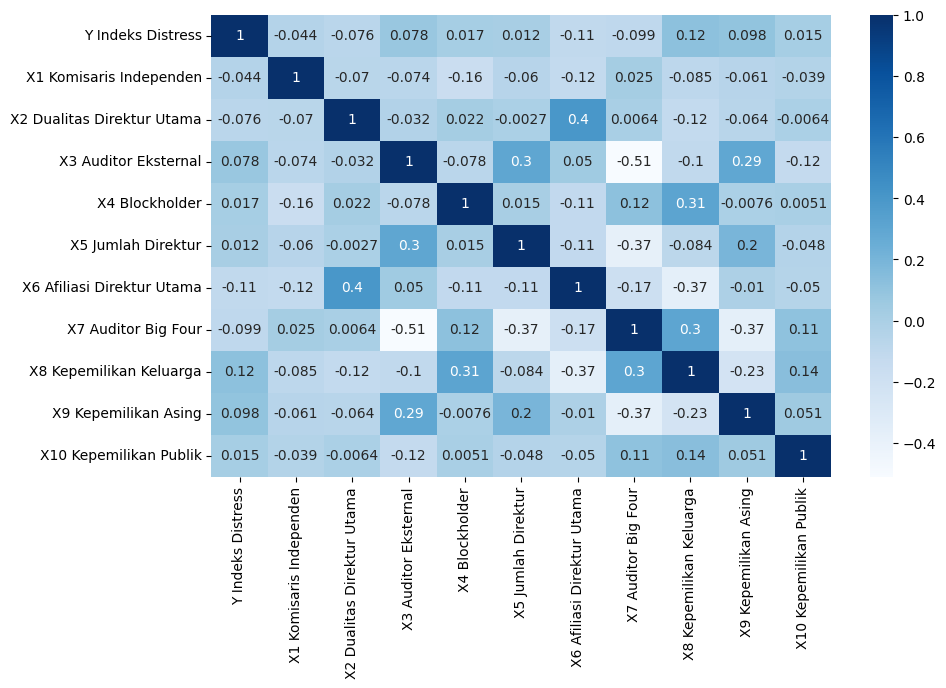

In [ ]:
fig, ax = plt.subplots(figsize=(10,6)) # Sample figsize in inches, change the number accordingly
sns.heatmap(df1.corr(method = 'spearman'), annot= True, cmap = 'Blues',ax = ax)

#**C. Data Imputing**

In [ ]:
# Missing Values -
  # The absence of values is a cause of concern for datasets and in Machine Learning model
  # When collecting observations about a variable, missing values can occur due to
    # 1. An error in machinery/equipment
    # 2. Error on part of the researcher
    # 3. Unavailable respondents
    # 4. Accidental deletion of observations
    # 5. Forgetfulness on part of the respondents
    # 6. Error in accounting, etc.

# Methods to impute Missing Values - Median, Mode and KNN Imputation

# Impute with
  # Median Value - For Continuous Data
  # Mode Value - For Categorical Data

# KNN Imputation
  # Each sample’s missing values are imputed using the mean value from n_neighbors
  # nearest neighbors found in the training set
  # Two samples are close if the features that neither is missing are close
  # By default, a euclidean distance metric that supports missing values
  # nan_euclidean_distances, is used to find the nearest neighbors
  # For imputing missing values in CATEGORICAL VALUES,
  # we have to encode the categorical values into numeric values
  # kNNImputer works only for numeric variables
  # We can perform this using a mapping of categories to numeric variables.

In [ ]:
# Calculate missing value counts for all columns
missing_value_counts = df1.isnull().sum()

# Calculate missing value percentages for all columns
missing_value_percentages = (missing_value_counts / len(df1)).round(2) * 100

# Combine missing value counts and percentages into a DataFrame
missing_data_all_columns = pd.DataFrame({
    'Missing Value Count': missing_value_counts,
    'Missing Value Percentage': missing_value_percentages
})

# Display the combined DataFrame
print("Missing Data for All Columns:")
print(missing_data_all_columns)

Missing Data for All Columns:
                            Missing Value Count  Missing Value Percentage
Y Indeks Distress                             0                       0.0
X1 Komisaris Independen                       2                       1.0
X2 Dualitas Direktur Utama                    2                       1.0
X3 Auditor Eksternal                          3                       2.0
X4 Blockholder                                2                       1.0
X5 Jumlah Direktur                            0                       0.0
X6 Afiliasi Direktur Utama                    2                       1.0
X7 Auditor Big Four                           2                       1.0
X8 Kepemilikan Keluarga                       4                       2.0
X9 Kepemilikan Asing                         27                      15.0
X10 Kepemilikan Publik                        5                       3.0


### **Imputating with Simple Imputer**

In [ ]:
# Impute whole dataset with MODE
df_impute=df1.copy()
# Specify the columns you want to impute
columns_to_impute1 = ['X2 Dualitas Direktur Utama', 'X6 Afiliasi Direktur Utama', 'X7 Auditor Big Four']

# Create the imputer object
imputer = SimpleImputer(strategy='most_frequent')

# Fit and transform the data
df_impute[columns_to_impute1] = imputer.fit_transform(df_impute[columns_to_impute1])

# Display the resulting DataFrame
print(df_impute)

# Inference :
# As we can observe all the values are imputed with MALE
# In reality, missing values are 2 Females and 1 Male
# So accuracy = 1/3 = 0.33

     Y Indeks Distress  X1 Komisaris Independen  X2 Dualitas Direktur Utama  \
0                    1                 0.250000                         0.0   
1                    0                 0.333333                         0.0   
2                    0                 0.333333                         0.0   
4                    1                 0.333333                         0.0   
5                    1                 0.333333                         0.0   
..                 ...                      ...                         ...   
172                  1                 0.500000                         0.0   
173                  1                 0.833333                         0.0   
174                  1                 0.400000                         0.0   
175                  1                 0.333333                         0.0   
176                  0                 0.500000                         0.0   

     X3 Auditor Eksternal  X4 Blockholder  X5 Jumla

In [ ]:
# Impute whole dataset with most_frequent
df_impute2=df_impute.copy()

# Specify the columns you want to impute
columns_to_impute2 = ['Y Indeks Distress', 'X5 Jumlah Direktur', 'X8 Kepemilikan Keluarga', 'X9 Kepemilikan Asing',
                      'X10 Kepemilikan Publik', 'X1 Komisaris Independen', 'X3 Auditor Eksternal', 'X4 Blockholder']

# Create the imputer object
imputer1 = SimpleImputer(strategy='most_frequent')

# Fit and transform the data
df_impute2[columns_to_impute2] = imputer1.fit_transform(df_impute2[columns_to_impute2])

# Display the resulting DataFrame
print(df_impute2)

# Inference :
# As we can observe all the values are imputed with MALE
# In reality, missing values are 2 Females and 1 Male
# So accuracy = 1/3 = 0.33

     Y Indeks Distress  X1 Komisaris Independen  X2 Dualitas Direktur Utama  \
0                  1.0                 0.250000                         0.0   
1                  0.0                 0.333333                         0.0   
2                  0.0                 0.333333                         0.0   
4                  1.0                 0.333333                         0.0   
5                  1.0                 0.333333                         0.0   
..                 ...                      ...                         ...   
172                1.0                 0.500000                         0.0   
173                1.0                 0.833333                         0.0   
174                1.0                 0.400000                         0.0   
175                1.0                 0.333333                         0.0   
176                0.0                 0.500000                         0.0   

     X3 Auditor Eksternal  X4 Blockholder  X5 Jumla

In [ ]:
df_impute2.isnull().sum()

Y Indeks Distress             0
X1 Komisaris Independen       0
X2 Dualitas Direktur Utama    0
X3 Auditor Eksternal          0
X4 Blockholder                0
X5 Jumlah Direktur            0
X6 Afiliasi Direktur Utama    0
X7 Auditor Big Four           0
X8 Kepemilikan Keluarga       0
X9 Kepemilikan Asing          0
X10 Kepemilikan Publik        0
dtype: int64

#**D. Feature Engineering**

In [ ]:
# Feature Engineering

# It helps in increasing the accuracy of the model as by tweaking the features of the data
# the performance of the models can be improved which ultimately influences the final result.

# Normally Feature Engineering contains 3 Major Steps :
# 1.Feature Transformation
# 2.Feature Scaling
# 3.Feature Construction

##**Feature Transformation**

In [ ]:
# 1. Feature Transformation
# Features are transformed by replacing the observations of the feature by a function
# Sometimes the datasets are not normally distributed and in such circumstances
# for the normal functioning of various statistical and other machine learning algorithms
# feature transformation is performed to normalize the data
# The common application of them is when dealing with predictive models
# such as Linear Regression where we need to normalize the data if the data is otherwise.
# Methods Used: 1.Log Transformation 2.Square Root 3.Cube Root and 4.Box-Cox Transformation

In [ ]:
# # Skewness

# # Spreadness of the Distribution
# # If Skewness = 0, data is perfectly symmetrical / Normally Distributed
# # If Skewness is less than -1 or greater +1, distribution is highly skewed
# # If Skewness is between -1 and -0.5 or between 0.5 and 1, distribution is moderately skewed
# # If Skewness is between -0.5 and 0.5 then it is approximately symmetric

# # Import necessary libraries
# import pandas as pd

# # Assuming data2 is your DataFrame with cleanz values
# skewness = df_impute2.skew()

# # Sort the skewness values in ascending order
# skewness_sorted = skewness.sort_values(ascending=True)

# # Display the sorted skewness values
# print(skewness_sorted)

In [ ]:
# from scipy.stats import boxcox
# df_impute3 = df_impute2.copy()

# # Define the columns to apply Box-Cox transformation
# boxcox_columns = ['X9 Kepemilikan Asing', 'X10 Kepemilikan Publik', 'X4 Blockholder']

# # Initialize a DataFrame to store transformed data
# transformed_data = pd.DataFrame()

# # Initialize a list to store optimal lambda values for each column
# optimal_lambdas = []

# # Perform Box-Cox transformation on specified columns
# for col in df_impute3.columns:
#     if col in boxcox_columns:
#         # Perform Box-Cox transformation for the current column
#         transformed_col, best_lambda = boxcox(df_impute3[col] + 1e-6)  # Add a small constant to avoid zero values
#         # Store the transformed column in the DataFrame
#         transformed_data[col] = transformed_col
#         # Store the optimal lambda value for the current column
#         optimal_lambdas.append(best_lambda)
#     else:
#         # If the column is excluded or not in the boxcox_columns, simply copy it to the transformed DataFrame
#         transformed_data[col] = df_impute3[col]
#         # Assign a lambda value of None for excluded columns
#         optimal_lambdas.append(None)

# # Plot distribution of the Box-Cox-transformed data for each column
# for column in transformed_data.columns:
#     sns.histplot(transformed_data[column], label=column, kde=True)
# plt.legend()
# plt.show()

# # Display the optimal lambda values for each column
# print("Optimal Lambda Values:")
# for col, lam in zip(transformed_data.columns, optimal_lambdas):
#     print(f"Column '{col}': Lambda = {lam}")

In [ ]:
# # Calculate skewness after Box-Cox transformation
# skewness_after_boxcox = transformed_data.skew().round(2)
# print("Skewness after Box-Cox Transformation:")
# print(skewness_after_boxcox)

In [ ]:
# # Convert the RangeIndex to DataFrame and set column names
# data3_df = pd.DataFrame(transformed_data, columns=df_impute2.columns)
# data3_df

##**Feature Scaling**

In [ ]:
# 2. Feature Scaling
# Feature scaling is conducted to standardize the independent features
# This is done because the range of raw data may vary widely.
# Some predictive models such as KNN and K-means consider Euclidean distance
# it is important for them to have the features on the same scale.
# Method Used: Min-Max Scaler

In [ ]:
# Min Max Scaler

# MinMaxScaler method is one of the methods of standardizing
# the data where values are made to lie between 0 and 1.

# Initialization
# We begin with initializing the min_max function.

# Columns to exclude
columns_to_exclude = ['0','1','2','3']

# Extract the columns to scale
columns_to_scale = [col for col in df_impute2.columns if col not in columns_to_exclude]

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform selected numeric columns
df_cleanz_boxcox_minmax = df_impute2 .copy()
df_cleanz_boxcox_minmax[columns_to_scale] = scaler.fit_transform(df_cleanz_boxcox_minmax[columns_to_scale])

# Print or use the scaled DataFrame
df_cleanz_boxcox_minmax.head()

# Inference : Range is set from 0 to 1

,Y Indeks Distress,X1 Komisaris Independen,X2 Dualitas Direktur Utama,X3 Auditor Eksternal,X4 Blockholder,X5 Jumlah Direktur,X6 Afiliasi Direktur Utama,X7 Auditor Big Four,X8 Kepemilikan Keluarga,X9 Kepemilikan Asing,X10 Kepemilikan Publik
0,1.0,0.3,0.0,0.289474,0.333333,0.250000,1.0,0.0,0.0,0.000471,0.000030
1,0.0,0.4,0.0,1.000000,0.333333,0.416667,0.0,1.0,0.3,0.000046,0.000040
2,0.0,0.4,0.0,0.000000,0.000000,0.250000,0.0,1.0,0.0,0.000092,0.000035
4,1.0,0.4,0.0,0.026316,0.000000,0.083333,0.0,1.0,0.3,0.000005,0.000045
5,1.0,0.4,0.0,0.000000,0.000000,0.083333,1.0,1.0,0.1,0.000006,0.000014


###Z-Score

In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import zscore

# Assuming df is your DataFrame
# Select only the numeric columns
# df_numeric = df1.select_dtypes(include=np.number)

# Calculate Z-scores for all numeric columns
z_scores = df_impute2.apply(zscore)

# Display the first 5 rows of Z-scores for all columns
print("First 5 rows of Z-Scores:")
print(z_scores.head())
print("\n")

# Filter out rows where any Z-score is greater than 3 (considered as outliers)
outlier_indices = np.where(np.abs(z_scores) > 3)
outlier_rows = np.unique(outlier_indices[0])

# Display rows where any Z-score is greater than 3
print("Filtering out Z-Score > 3:")
print("Row Numbers where Z-Score is greater than 3:")
print(outlier_rows)
print("\n")

# Display exact values of the columns for the identified outliers
print("Checking exact values for outliers:")
for idx in outlier_rows:
    if idx < len(df_impute2):
        print(df_impute2.iloc[idx])

# Print Z-score values of outliers
print("Z-score values of outliers:")
for idx in outlier_rows:
    if idx < len(z_scores):
        print(f"Row {idx}: {z_scores.iloc[idx]}")

First 5 rows of Z-Scores:
   Y Indeks Distress  X1 Komisaris Independen  X2 Dualitas Direktur Utama  \
0           1.028992                -1.424405                    -0.65911   
1          -0.971825                -0.677947                    -0.65911   
2          -0.971825                -0.677947                    -0.65911   
4           1.028992                -0.677947                    -0.65911   
5           1.028992                -0.677947                    -0.65911   

   X3 Auditor Eksternal  X4 Blockholder  X5 Jumlah Direktur  \
0             -0.638455        0.472744            0.211777   
1              1.443463        0.472744            1.138299   
2             -1.486643       -0.917679            0.211777   
4             -1.409535       -0.917679           -0.714746   
5             -1.486643       -0.917679           -0.714746   

   X6 Afiliasi Direktur Utama  X7 Auditor Big Four  X8 Kepemilikan Keluarga  \
0                    0.896729            -1.517197   

In [ ]:
# Create a DataFrame containing the exact values of the columns for the identified outliers
outlier_values = df_cleanz_boxcox_minmax.iloc[outlier_rows]

# Export the outlier values to a CSV file
outlier_values.to_csv("outlier_values.csv", index=False)

In [ ]:
# Export the transformed DataFrame to a CSV file
df_impute2.to_csv('Data Skripsi Outlier7.csv', index=False)
df_impute2

,Y Indeks Distress,X1 Komisaris Independen,X2 Dualitas Direktur Utama,X3 Auditor Eksternal,X4 Blockholder,X5 Jumlah Direktur,X6 Afiliasi Direktur Utama,X7 Auditor Big Four,X8 Kepemilikan Keluarga,X9 Kepemilikan Asing,X10 Kepemilikan Publik
0,1.0,0.250000,0.0,12.0,3.0,5.0,1.0,0.0,0.0,0.508638,0.145084
1,0.0,0.333333,0.0,39.0,3.0,7.0,0.0,1.0,3.0,0.050000,0.198100
2,0.0,0.333333,0.0,1.0,1.0,5.0,0.0,1.0,0.0,0.099573,0.169200
4,1.0,0.333333,0.0,2.0,1.0,3.0,0.0,1.0,3.0,0.005900,0.219200
5,1.0,0.333333,0.0,1.0,1.0,3.0,1.0,1.0,1.0,0.006380,0.070000
...,...,...,...,...,...,...,...,...,...,...,...
172,1.0,0.500000,0.0,31.0,2.0,3.0,0.0,1.0,3.0,0.000000,0.201400
173,1.0,0.833333,0.0,26.0,1.0,10.0,0.0,0.0,0.0,1081.000000,0.114510
174,1.0,0.400000,0.0,36.0,3.0,4.0,0.0,0.0,1.0,15.000000,0.150300
175,1.0,0.333333,0.0,8.0,5.0,5.0,0.0,1.0,5.0,30.000000,0.368500


#**F. Exploratory Data Analysis (EDA)**

## **1. Univariate Analysis**

### **Contionous**

<Axes: >

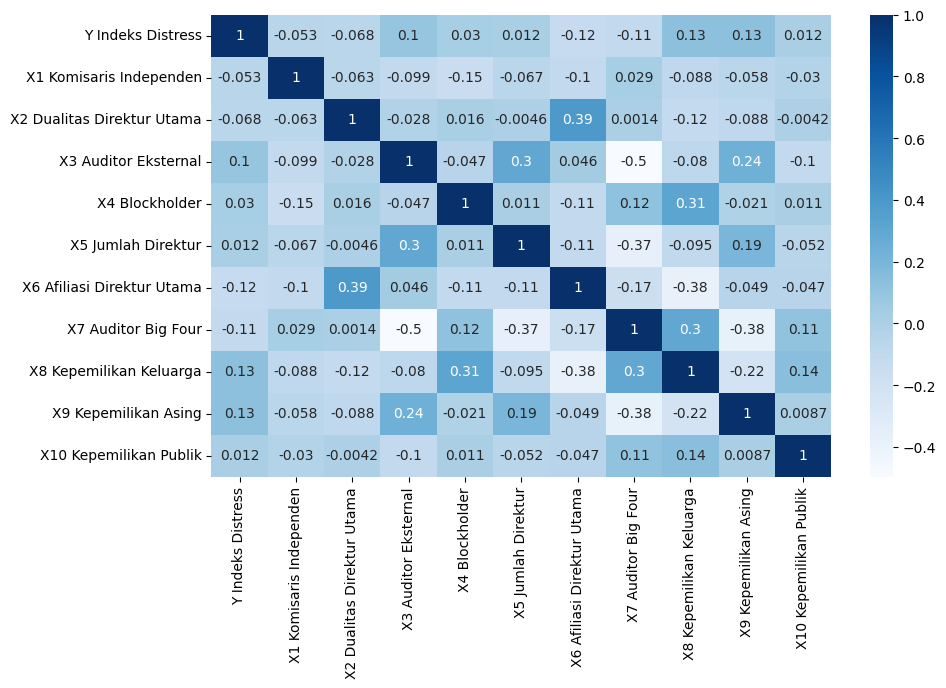

In [ ]:
fig, ax = plt.subplots(figsize=(10,6)) # Sample figsize in inches, change the number accordingly
sns.heatmap(df_cleanz_boxcox_minmax.corr(method = 'spearman'), annot= True, cmap = 'Blues',ax = ax)

In [ ]:
df_cleanz_boxcox_minmax.describe()

,Y Indeks Distress,X1 Komisaris Independen,X2 Dualitas Direktur Utama,X3 Auditor Eksternal,X4 Blockholder,X5 Jumlah Direktur,X6 Afiliasi Direktur Utama,X7 Auditor Big Four,X8 Kepemilikan Keluarga,X9 Kepemilikan Asing,X10 Kepemilikan Publik
count,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000
mean,0.485714,0.490822,0.302857,0.507368,0.220000,0.211905,0.554286,0.697143,0.153143,0.006461,0.005760
std,0.501230,0.134350,0.460812,0.342264,0.240423,0.180400,0.498471,0.460812,0.181877,0.075683,0.075589
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.400000,0.000000,0.184211,0.000000,0.083333,0.000000,0.000000,0.000000,0.000001,0.000024
50%,0.000000,0.400000,0.000000,0.552632,0.166667,0.166667,1.000000,1.000000,0.100000,0.000050,0.000041
75%,1.000000,0.600000,1.000000,0.815789,0.333333,0.250000,1.000000,1.000000,0.300000,0.000297,0.000063
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### **Categorical**

TypeError: enumerate() missing required argument 'iterable' (pos 1)

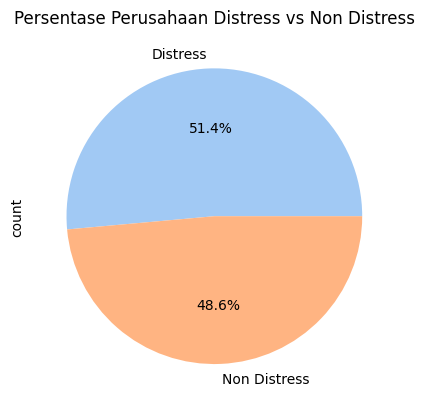

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set seaborn palette to pastel
sns.set_palette('pastel')

# Assuming df_cleanz_boxcox_minmax contains the DataFrame with the 'Distress' column
# Value 0 represents distress and 1 represents non-distress
df_cleanz_boxcox_minmax2 = df_cleanz_boxcox_minmax.copy()
# Map values to labels
label_map = {0: 'Distress', 1: 'Non Distress'}
df_cleanz_boxcox_minmax2['Y Indeks Distress'] = df_cleanz_boxcox_minmax2['Y Indeks Distress'].map(label_map)

# Plotting the pie chart
pie_chart = df_cleanz_boxcox_minmax2['Y Indeks Distress'].value_counts().plot(kind='pie', autopct='%1.1f%%')

# Adding title
plt.title('Persentase Perusahaan Distress vs Non Distress')

# # Get value counts
# value_counts = df_cleanz_boxcox_minmax2['Y Indeks Distress'].value_counts()

# Annotate the pie chart with counts
for i, v in enumerate():
    plt.text(i, 0, f"{v}", color='black', ha='center')

# Display the plot
plt.show()

##**2. Bivariate Analysis**

### **a. Contionous vs Contionous**

In [ ]:
fig, ax = plt.subplots(figsize=(10,6)) # Sample figsize in inches, change the number accordingly
sns.heatmap(df_cleanz_boxcox_minmax.corr(method = 'spearman'), annot= True, cmap = 'Blues',ax = ax)

# MEDV and LSTAT is having -0.85, we might need to remove one variable

### **b. Categorical vs Categorical**

In [ ]:
import pandas as pd

# Create an empty dictionary to store contingency tables
object_columns = ['Y Indeks Distress', 'X2 Dualitas Direktur Utama', 'X6 Afiliasi Direktur Utama', 'X7 Auditor Big Four']

contingency_tables = {}

# Iterate through each pair of object-type columns
for i, col1 in enumerate(object_columns):
    for j, col2 in enumerate(object_columns):
        # Skip the same column pairs and ensure the first column comes before the second column
        if i >= j:
            continue

        # Create a contingency table for the current pair of columns
        contingency_table = pd.crosstab(df_cleanz_boxcox_minmax[col1], df_cleanz_boxcox_minmax[col2])

        # Store the contingency table in the dictionary
        contingency_tables[(col1, col2)] = contingency_table

# Print or use the contingency tables as needed
for pair, table in contingency_tables.items():
    print(f"Contingency Table for columns {pair}:\n{table}\n")

In [ ]:
# Chi Square Test
# So we took two categorical columns - Petal Width(Bins) and Class

# Chi Square Hypothesis :
# Null hypothesis - Petal Width (Bins) has no affect on Class
# Alternate hypothesis - Petal Width (Bins) has some affect on Class

# Chi Square Test
from scipy import stats
chi2_stat,p_val,dof,ex = stats.chi2_contingency(contingency_table)
print("CHI-SQUARE TEST VALUES")
print("Chi Square Value : ",chi2_stat)
print("Degree of Freedom : ",dof)
print("P Value : ", p_val)
print("Contigency Table")
ex



# Inference :
# P-Value is 1.339^-22 which is quite smaller than threshold value of 5%(95% Confidence)
# This enable us to REJECT NULL HYPOTHESIS and ACCEPT ALTERNATE HYPOTHESIS
# In other word, Petal Width(Bins) has impact on Class
# And we can also say Petal Width(Bins) is a good predictor for Class

In [ ]:
# Exclude 'Y Indeks Distress' and 'Kode' columns from object columns
object_columns_excluding_distress_kode = [col for col in object_columns if col not in ['Y Indeks Distress', 'Kode']]

# Group by 'Distress' column and count occurrences of each unique value for all other object columns
count_distress = df_cleanz_boxcox_minmax.groupby('Y Indeks Distress')[object_columns_excluding_distress_kode].count().reset_index()

# Set up the matplotlib figure
plt.figure(figsize=(16, 16))

# Plot count plots for each object column
for i, col in enumerate(object_columns_excluding_distress_kode, start=1):
    plt.subplot(4, 4, i)  # Adjust the subplot index

    # Plot count plot
    sns.countplot(data=df_cleanz_boxcox_minmax, x=col, hue='Y Indeks Distress')
    plt.title(f'Count Plot of {col} by Distress')

plt.tight_layout()
plt.show()

### **c. Categorical vs Continous**

In [ ]:
# Define an empty dictionary to store chi-square test results for each variable
chi_square_results = {}

# Loop through each column in the DataFrame
for column in df_cleanz_boxcox_minmax.columns:
    # Create a contingency table for the current variable and the target variable
    contingency_table = pd.crosstab(df_cleanz_boxcox_minmax[column], df_cleanz_boxcox_minmax['Y Indeks Distress'])

    # Perform chi-square test
    chi2_stat, p_val, dof, ex = stats.chi2_contingency(contingency_table)

    # Store the chi-square test results in the dictionary
    chi_square_results[column] = {
        'Chi Square Value': chi2_stat,
        'Degree of Freedom': dof,
        'P Value': p_val,
        'Contingency Table': contingency_table
    }

# Print the chi-square test results for each variable
for column, result in chi_square_results.items():
    print(f"Chi Square Test Results for '{column}':")
    print("Chi Square Value:", result['Chi Square Value'])
    print("Degree of Freedom:", result['Degree of Freedom'])
    print("P Value:", result['P Value'])

 # Set the significance level
alpha = 0.05

# Loop through chi-square test results for each variable
for column, result in chi_square_results.items():
    p_val = result['P Value']

    # Determine significance based on p-value
    if p_val < alpha:
        print(f"Chi Square Test for '{column}' is significant (p-value: {p_val:.4f} < {alpha})")
    else:
        print(f"Chi Square Test for '{column}' is not significant (p-value: {p_val:.4f} >= {alpha})")

    print("\n")

In [ ]:
# Determine the number of rows and columns for subplots
n_cols = 4
n_rows = 2

# Calculate the figsize based on the number of columns
figsize = (5 * n_cols, 5 * n_rows)

In [ ]:
# Create subplots for each column
continuous_columns = ['X5 Jumlah Direktur', 'X8 Kepemilikan Keluarga', 'X9 Kepemilikan Asing',
       'X10 Kepemilikan Publik', 'X1 Komisaris Independen',
       'X3 Auditor Eksternal', 'X4 Blockholder']

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=figsize)
for i, col in enumerate(continuous_columns):
    row_index = i // n_cols
    col_index = i % n_cols
    sns.boxplot(data=df_cleanz_boxcox_minmax, x='Y Indeks Distress', y=col, ax=axes[row_index, col_index])
    axes[row_index, col_index].set_title(col)
    axes[row_index, col_index].set_xlabel('Distress')
    axes[row_index, col_index].set_ylabel(col)
plt.tight_layout()
plt.show()

membuat distribusi kategori vs numerik untuk mengetahui perbedaan karakteristik

In [ ]:
# 3) Categorical and Numerical Columns - T Test, Z Test and ANOVA

# Z Test(n > 30), T Test(n < 30) and ANNOVA
# Z Test and T Test are basically same
# They assess whether the average of two groups are statistically different from each other
# This analysis is appropiate from comparing the average of a numerical variables
# for two categories of a categorical variable

# If the probability of Z is small, difference between two average is more significant
# T Test is used when n =< 30, we use Z Test when n > 30 and n is Number of samples
# Continuous Column to do analysis - Sepal Length (cm)
# Categorical Column to do analysis - Class

# Null Hypothesis :
  # Sepal Length has NO AFFECT on Class
  # There is no statistically difference between Speal Length values for Various Class

# Alternate Hypothesis :
  # Sepal Length has SOME AFFECT on Class
  # There is difference between Observed Sepal Length values for Various Class

In [ ]:
# from statsmodels.stats.weightstats import ztest

# # Make a copy of the DataFrame to avoid modifying the original
# df_copy = df_cleanz_boxcox_minmax.copy()

# # Map values to labels
# label_map = {'Distress' : 0, 'Non Distress' : 1}
# df_copy['Y Indeks Distress'] = df_copy['Y Indeks Distress'].map(label_map)

# # Convert 'Y Indeks Distress' column to numeric and handle errors
# df_copy['Y Indeks Distress'] = pd.to_numeric(df_copy['Y Indeks Distress'], errors='coerce')

# # Convert relevant columns to numeric types
# numeric_columns = df_copy.columns.difference(['Y Indeks Distress'])
# df_copy[numeric_columns] = df_copy[numeric_columns].apply(pd.to_numeric, errors='coerce')

# # Create an empty DataFrame to store results
# ztest_results = pd.DataFrame(columns=['Column', 'Z-test statistic', 'P-value'])

# # Loop through columns (excluding 'Y Indeks Distress' column)
# for col in numeric_columns:
#     # Drop NaN values from both columns before performing z-test
#     col_values = df_copy[col].dropna()
#     distress_values = df_copy['Y Indeks Distress'].dropna()

#     # Perform z-test
#     ztest_stat, pval = ztest(col_values, distress_values, alternative='two-sided')

#     # Append results to the DataFrame
#     ztest_results = ztest_results.append({'Column': col, 'Z-test statistic': ztest_stat, 'P-value': pval}, ignore_index=True)

# # Display the results
# print(ztest_results)

In [ ]:
# ANOVA Test
# T or Z test works while dealing with two groups
# ANOVA help us to compare more than two groups at the same time
# If we use t-test then we need to carry out seperate t-test for each pair of group
# In short ANOVA help us to compare multiple group at the same time

In [ ]:
# Filter columns based on your criteria
# For example, you might want to exclude columns with too many unique values or too few unique values for meaningful tests

import scipy.stats as stats

# Identify object and float columns
numeric_columns = df_cleanz_boxcox_minmax.select_dtypes(include=['float64', 'int64']).columns

# Iterate through each pair of numeric columns
for col1 in numeric_columns:
    for col2 in numeric_columns:
        if col1 != col2:
            # Extract numeric values from the columns
            float_values = df_cleanz_boxcox_minmax[col1].dropna()
            obj_values = df_cleanz_boxcox_minmax[col2].dropna()

            # Perform t-test if both columns have values
            if len(float_values) > 0 and len(obj_values) > 0:
                # Perform t-test
                t_statistic, p_value = stats.ttest_ind(float_values, obj_values, nan_policy='omit')

                # Print results
                print(f"Test between {col1} and {col2}:")
                print(f"T-statistic: {t_statistic}")
                print(f"P-value: {p_value}")
                if p_value < 0.05:
                    print("The difference is statistically significant.\n")
                else:
                    print("The difference is not statistically significant.\n")
            else:
                print(f"Not enough data for t-test between {col1} and {col2}.\n")

## **3. Multivariate Analysis**

bisa menggunakan chisquare atau mahalanobis

In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency

# Assuming df_cleanz is your DataFrame
# Step 2: Discretize continuous columns (if needed)
# Here, we'll discretize continuous columns into quartiles
# Discretize continuous columns into quartiles, dropping duplicate edges
df_cleanz3 = df_cleanz_boxcox_minmax.copy()
for col in continuous_columns:
    print(f"Processing column: {col}")
    print(f"Length of {col}: {len(df_cleanz3[col])}")
    df_cleanz3[col + '_bin'] = pd.qcut(df_cleanz3[col], q=4, labels=False, duplicates='drop')

# Step 3: Perform chi-square test for each pair of variables
chi2_results = {}
for cat_col in object_columns:
    for num_col in continuous_columns:
        contingency_table = pd.crosstab(df_cleanz3[cat_col], df_cleanz3[num_col + '_bin'])
        chi2, p, dof, expected = chi2_contingency(contingency_table)
        chi2_results[(cat_col, num_col)] = {'chi2': chi2, 'p-value': p}

# Print chi-square test results
for pair, result in chi2_results.items():
    cat_col, num_col = pair
    print(f"Chi-square test between '{cat_col}' and '{num_col}':")
    print(f"  Chi-square statistic: {result['chi2']}")
    print(f"  p-value: {result['p-value']}")

## Logistic Regression

In [ ]:
df2 = df_cleanz_boxcox_minmax.copy()
df2

,Y Indeks Distress,X1 Komisaris Independen,X2 Dualitas Direktur Utama,X3 Auditor Eksternal,X4 Blockholder,X5 Jumlah Direktur,X6 Afiliasi Direktur Utama,X7 Auditor Big Four,X8 Kepemilikan Keluarga,X9 Kepemilikan Asing,X10 Kepemilikan Publik
0,1.0,0.30,0.0,0.289474,0.333333,0.250000,1.0,0.0,0.0,0.000471,0.000030
1,0.0,0.40,0.0,1.000000,0.333333,0.416667,0.0,1.0,0.3,0.000046,0.000040
2,0.0,0.40,0.0,0.000000,0.000000,0.250000,0.0,1.0,0.0,0.000092,0.000035
4,1.0,0.40,0.0,0.026316,0.000000,0.083333,0.0,1.0,0.3,0.000005,0.000045
5,1.0,0.40,0.0,0.000000,0.000000,0.083333,1.0,1.0,0.1,0.000006,0.000014
...,...,...,...,...,...,...,...,...,...,...,...
172,1.0,0.60,0.0,0.789474,0.166667,0.083333,0.0,1.0,0.3,0.000000,0.000041
173,1.0,1.00,0.0,0.657895,0.000000,0.666667,0.0,0.0,0.0,1.000000,0.000023
174,1.0,0.48,0.0,0.921053,0.333333,0.166667,0.0,0.0,0.1,0.013876,0.000031
175,1.0,0.40,0.0,0.184211,0.666667,0.250000,0.0,1.0,0.5,0.027752,0.000075


In [ ]:
# @title
import pandas as pd

# Create an empty dictionary to store contingency tables
all_columns = ['Y Indeks Distress','X1 Komisaris Independen','X2 Dualitas Direktur Utama','X3 Auditor Eksternal',
                  'X4 Blockholder', 'X5 Jumlah Direktur','X6 Afiliasi Direktur Utama', 'X7 Auditor Big Four',
                  'X8 Kepemilikan Keluarga', 'X9 Kepemilikan Asing', 'X10 Kepemilikan Publik']


contingency_tables = {}
chi_square_results = {}
chi_square_pvalue = []

# Iterate through each pair of object-type columns
for i, col1 in enumerate(all_columns):
    for j, col2 in enumerate(all_columns):
        # Skip the same column pairs and ensure the first column comes before the second column
        if i >= j:
            continue

        # Create a contingency table for the current pair of columns
        contingency_table = pd.crosstab(df2[col1], df2[col2])

        # Calculate chi-square statistic and other associated values
        chi2, p, dof, expected = chi2_contingency(contingency_table)

        # Store the contingency table and chi-square results in dictionaries
        contingency_tables[(col1, col2)] = contingency_table
        chi_square_results[(col1, col2)] = {'chi2': chi2, 'p-value': p, 'dof': dof, 'expected': expected}

# Print or use the contingency tables and chi-square results as needed
for pair, table in contingency_tables.items():
    print(f"Contingency Table for columns {pair}:\n{table}\n")

for pair, result in chi_square_results.items():
    print(f"Chi-square Test Results for columns {pair}:")
    print(f"Chi-square statistic: {result['chi2']}")
    print(f"P-value: {result['p-value']}")
    if result['p-value'] < 0.05:
        print("The result is statistically significant (p < 0.05)")
    else:
        print("The result is not statistically significant (p >= 0.05)")
    print(f"Degrees of Freedom: {result['dof']}\n")
    chi_square = {
        "Variabel": pair,
        "Chi-Square P-Value": result['p-value']
    }
    chi_square_pvalue.append(chi_square)

# Create DataFrame from the list of chi_square_pvalue
pvalue = pd.DataFrame(chi_square_pvalue)

# Save DataFrame to CSV
pvalue.to_csv('pvalue.csv', index=False)

pvalue

In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency
from itertools import combinations

# Assuming df2 is your DataFrame containing the data
# Define features (x) and target (y)
x = df2[['X1 Komisaris Independen','X2 Dualitas Direktur Utama','X3 Auditor Eksternal',
                'X5 Jumlah Direktur','X6 Afiliasi Direktur Utama', 'X7 Auditor Big Four',
                'X8 Kepemilikan Keluarga', 'X9 Kepemilikan Asing', 'X10 Kepemilikan Publik']]
y = df2['Y Indeks Distress']

In [ ]:
# @title
import pandas as pd
from scipy.stats import chi2_contingency

# Function to perform chi-square test on a contingency table
def chi_square_test(contingency_table):
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    return p

# Assuming df2 is your DataFrame

# Define the target variable column
target_col = 'Y Indeks Distress'

# List of predictors (excluding the target variable)
predictor_cols = [col for col in df2.columns if col != target_col]

# Perform backward selection
def backward_selection(df2, predictors, target_col, threshold=0.05):
    print("Backward Selection:")
    while len(predictors) > 0:
        p_values = []
        for predictor in predictors:
            contingency_table = pd.crosstab(df2[predictor], df2[target_col])
            p_value = chi_square_test(contingency_table)
            p_values.append((predictor, p_value))

        # Find the predictor with the highest p-value
        worst_predictor, worst_p_value = max(p_values, key=lambda x: x[1])

        # If the worst predictor's p-value is above the threshold, remove it
        if worst_p_value > threshold:
            predictors.remove(worst_predictor)
            print(f"Removed predictor: {worst_predictor}, p-value: {worst_p_value}")
        else:
            break

    return predictors

# Perform backward selection
selected_predictors_backward = backward_selection(df2, predictor_cols.copy(), target_col)
print("Final predictors selected by backward selection:", selected_predictors_backward)

Backward Selection:
Removed predictor: X1 Komisaris Independen, p-value: 0.6300521168474071
Removed predictor: X3 Auditor Eksternal, p-value: 0.6236004835966615
Removed predictor: X8 Kepemilikan Keluarga, p-value: 0.5285104405266855
Removed predictor: X2 Dualitas Direktur Utama, p-value: 0.4603556636012418
Removed predictor: X9 Kepemilikan Asing, p-value: 0.44161733852506324
Removed predictor: X10 Kepemilikan Publik, p-value: 0.43849464681705236
Removed predictor: X4 Blockholder, p-value: 0.37992723589179067
Removed predictor: X5 Jumlah Direktur, p-value: 0.2717502941241107
Removed predictor: X7 Auditor Big Four, p-value: 0.21619651903240908
Removed predictor: X6 Afiliasi Direktur Utama, p-value: 0.16028942984708472
Final predictors selected by backward selection: []


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.discrete.discrete_model import Logit
import warnings

# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')

# Assume `x` and `y` are your input features and target variable
# Ensure that x and y are defined here, e.g., from your data

# Initialize lists to store metrics for each fold
metrics_per_fold = []
metrics_per_num_fold = []

# Define the number of folds for both 5-fold and 10-fold cross-validation
num_folds = [5, 10]

# Define the parameter grid for GridSearchCV
param_grid = [
    {'penalty': ['l2'], 'solver': ['lbfgs', 'newton-cg', 'sag', 'saga'], 'C': [0.01, 0.1, 1, 10, 100]},
    {'penalty': ['l1'], 'solver': ['saga'], 'C': [0.01, 0.1, 1, 10, 100]},
    {'penalty': ['elasticnet'], 'solver': ['saga'], 'C': [0.01, 0.1, 1, 10, 100], 'l1_ratio': [0.5, 0.7, 0.9]},
    {'penalty': ['none'], 'solver': ['lbfgs', 'newton-cg', 'sag', 'saga']}
]

# Convert one-hot encoded target `y` to class labels if necessary
if len(y.shape) > 1 and y.shape[1] > 1:
    y = np.argmax(y.values, axis=1)

# Ensure indices are reset
x = x.reset_index(drop=True)
y = y.reset_index(drop=True)

# Loop over each value of num_folds
for num_fold in num_folds:
    kf = KFold(n_splits=num_fold, shuffle=True, random_state=42)
    fold = 1

    for train_index, test_index in kf.split(x):
        x_train, x_test = x.iloc[train_index], x.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Define logistic regression model with GridSearchCV
        model_lr = LogisticRegression(max_iter=1000)
        grid_search = GridSearchCV(estimator=model_lr, param_grid=param_grid, scoring='accuracy', n_jobs=-1)

        # Train logistic regression model with grid search on transformed data
        grid_search.fit(x_train, y_train)
        best_model = grid_search.best_estimator_

        # Predict on training set
        train_pred = best_model.predict(x_train)
        train_pred_prob = best_model.predict_proba(x_train)

        # Ensure y_train and y_test are 1D arrays
        y_train = np.ravel(y_train)
        y_test = np.ravel(y_test)

        # Calculate evaluation metrics for training set
        train_accuracy = accuracy_score(y_train, train_pred)
        train_precision = precision_score(y_train, train_pred, average='weighted', zero_division=1)
        train_recall = recall_score(y_train, train_pred, average='weighted')
        train_f1 = f1_score(y_train, train_pred, average='weighted')
        train_roc_auc = roc_auc_score(y_train, train_pred_prob[:, 1])

        # Predict on test set
        test_pred = best_model.predict(x_test)
        test_pred_prob = best_model.predict_proba(x_test)

        # Calculate evaluation metrics for test set
        test_accuracy = accuracy_score(y_test, test_pred)
        test_precision = precision_score(y_test, test_pred, average='weighted', zero_division=1)
        test_recall = recall_score(y_test, test_pred, average='weighted')
        test_f1 = f1_score(y_test, test_pred, average='weighted')
        test_roc_auc = roc_auc_score(y_test, test_pred_prob[:, 1])

        # Store metrics for this fold
        fold_metrics = {
            "Fold": fold,
            "Num Folds": num_fold,
            "Train Accuracy": train_accuracy,
            "Train Precision": train_precision,
            "Train Recall": train_recall,
            "Train F1": train_f1,
            "Train ROC-AUC": train_roc_auc,
            "Test Accuracy": test_accuracy,
            "Test Precision": test_precision,
            "Test Recall": test_recall,
            "Test F1": test_f1,
            "Test ROC-AUC": test_roc_auc
        }
        metrics_per_fold.append(fold_metrics)

        # Move to the next fold
        fold += 1

    # Print the best model and its parameters
    print(f"Best model for {num_fold}-fold cross-validation:")
    print(f"Best parameters: {grid_search.best_params_}\n")

    # Train logistic regression model with grid search on transformed data
    best_model.fit(x_train, y_train)

    # Predict on training set
    train_pred = best_model.predict(x_train)
    train_pred_prob = best_model.predict_proba(x_train)

    # Predict on test set
    test_pred = best_model.predict(x_test)
    test_pred_prob = best_model.predict_proba(x_test)

    # Ensure y_train is a 1D array
    y_train = np.ravel(y_train)
    y_test = np.ravel(y_test)

    # Fit the logistic regression model
    logit_model = Logit(y_train, sm.add_constant(train_pred_prob))
    logit_results = logit_model.fit()

    df1 = 9
    df_2 = len(y_train) - df1

    # Calculate log-likelihoods
    LL_null = logit_results.llnull
    LL_model = logit_results.llf

    # Calculate likelihood ratio test and p-value
    LR_statistic = -2 * (LL_null - LL_model)  # Likelihood ratio statistic
    LR_p_value = stats.chi2.sf(LR_statistic, df=df1)

    # Calculate pseudo R-squared values
    pseudo_r_squared = 1 - (LL_model / LL_null)
    cox_snell_r_squared = 1 - np.exp((LL_null - LL_model) * (2 / x_train.shape[0]))
    nagelkerke_r_squared = cox_snell_r_squared / (1 - np.exp(LL_null * (2 / x_train.shape[0])))

    HL_statistic = logit_results.llr
    HL_p_value = 1 - stats.chi2.cdf(HL_statistic, 10)

    odds_ratio = np.exp(best_model.coef_)
    intercept = best_model.intercept_
    coefficients = best_model.coef_[0]
    std_error = np.std(coefficients)

    vif_data = sm.add_constant(x_train)
    vif = pd.DataFrame()
    vif["Feature"] = vif_data.columns
    vif["VIF"] = [variance_inflation_factor(vif_data.values, i) for i in range(vif_data.shape[1])]

    wald_statistic = coefficients / std_error
    wald_p_values = stats.norm.sf(np.abs(wald_statistic)) * 2

    fold_metrics = {
        "Number Fold": num_fold,
        "Likelihood DF": df_2,
        "-2 Log Likelihood Null": -2 * LL_null,
        "-2 Log Likelihood Model": -2 * LL_model,
        "McFadden R2": pseudo_r_squared,
        "Cox & Snell R2": cox_snell_r_squared,
        "Nagelkerke R2": nagelkerke_r_squared,
        "McFadden R2": pseudo_r_squared,
        "Likelihood Ratio": LR_statistic,
        "LR P-Value": LR_p_value,
        "Hosmer-Lemeshow Chi-Squared": HL_statistic,
        "Hosmer-Lemeshow P-Value": HL_p_value,
        "Odds Ratio": odds_ratio,
        "Intercept": intercept,
        "Coefficients": coefficients,
        "VIF": vif.set_index('Feature').to_dict()['VIF'],
        "Wald Statistics": wald_statistic.tolist(),
        "Wald P-Values": wald_p_values.tolist(),
        "Train π(x)": list(train_pred_prob),
        "Train ŷ": list(train_pred),
        "Train y actual": list(y_train),
        "Test π(x)": list(test_pred_prob),
        "Test ŷ": list(test_pred),
        "Test y actual": list(y_test)
    }
    metrics_per_num_fold.append(fold_metrics)

# Convert the results into DataFrames
ori_metrics_df = pd.DataFrame(metrics_per_fold)
ori_metrics_num_fold_df = pd.DataFrame(metrics_per_num_fold)

# Save the metrics DataFrames to CSV files
ori_metrics_df.to_csv('ori_metrics_per_fold.csv', index=False)
ori_metrics_num_fold_df.to_csv('ori_metrics_per_num_fold', index=False)

Best model for 5-fold cross-validation:
Best parameters: {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}

Optimization terminated successfully.
         Current function value: 0.649570
         Iterations 19
Best model for 10-fold cross-validation:
Best parameters: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}

Optimization terminated successfully.
         Current function value: 0.651317
         Iterations 5


Top Features by Coefficient Magnitude:
                      Feature  Coefficient  Abs_Coefficient
7        X9 Kepemilikan Asing     2.005859         2.005859
8      X10 Kepemilikan Publik    -1.718274         1.718274
0     X1 Komisaris Independen    -1.314044         1.314044
3          X5 Jumlah Direktur    -1.110964         1.110964
6     X8 Kepemilikan Keluarga     0.962802         0.962802
5         X7 Auditor Big Four    -0.781916         0.781916
4  X6 Afiliasi Direktur Utama    -0.509166         0.509166
1  X2 Dualitas Direktur Utama    -0.229782         0.229782
2        X3 Auditor Eksternal     0.191985         0.191985


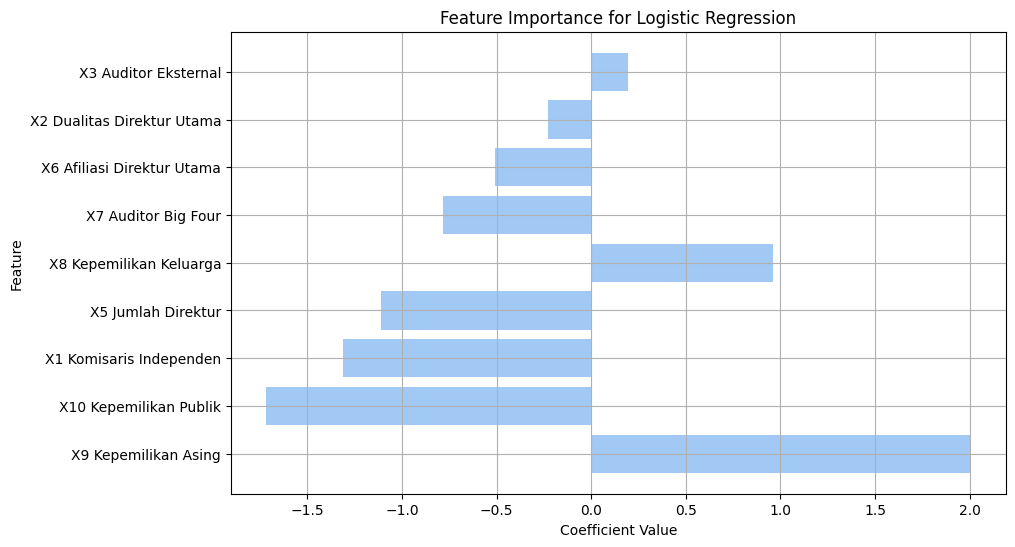

In [ ]:
# Extract coefficients and corresponding feature names
coefficients = best_model.coef_[0]
feature_names = x.columns

# Create a DataFrame to hold feature importance
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients,
    'Abs_Coefficient': np.abs(coefficients)
})

# Sort the DataFrame by absolute coefficient value to get feature importance ranking
feature_importance_df = feature_importance_df.sort_values(by='Abs_Coefficient', ascending=False)

# Print or visualize the top features
print("Top Features by Coefficient Magnitude:")
print(feature_importance_df)

# Optionally, you can plot the coefficients
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Coefficient'])
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Feature Importance for Logistic Regression')
plt.grid(True)
plt.show()

In [ ]:
ori_metrics_df

,Fold,Num Folds,Train Accuracy,Train Precision,Train Recall,Train F1,Train ROC-AUC,Test Accuracy,Test Precision,Test Recall,Test F1,Test ROC-AUC
0,1,5,0.635714,0.636642,0.635714,0.633521,0.658088,0.542857,0.542857,0.542857,0.542857,0.489510
1,2,5,0.521429,0.750459,0.521429,0.357411,0.607033,0.485714,0.750204,0.485714,0.317582,0.581699
2,3,5,0.535714,0.535897,0.535714,0.535121,0.578571,0.628571,0.625850,0.628571,0.626697,0.726667
3,4,5,0.628571,0.635239,0.628571,0.618365,0.653547,0.342857,0.301099,0.342857,0.302104,0.475490
4,5,5,0.657143,0.656097,0.657143,0.653197,0.659128,0.457143,0.506522,0.457143,0.449140,0.551020
5,1,10,0.617834,0.619320,0.617834,0.616964,0.627231,0.722222,0.728175,0.722222,0.701010,0.558442
6,2,10,0.624204,0.624557,0.624204,0.623746,0.675592,0.333333,0.375000,0.333333,0.350649,0.291667
7,3,10,0.617834,0.617725,0.617834,0.617679,0.644805,0.555556,0.569444,0.555556,0.555556,0.562500
8,4,10,0.643312,0.642928,0.643312,0.642176,0.652846,0.444444,0.444444,0.444444,0.444444,0.550000
9,5,10,0.592357,0.592747,0.592357,0.592456,0.626706,0.555556,0.558442,0.555556,0.550000,0.666667


In [ ]:
ori_metrics_num_fold_df

,Number Fold,Likelihood DF,-2 Log Likelihood Null,-2 Log Likelihood Model,McFadden R2,Cox & Snell R2,Nagelkerke R2,Likelihood Ratio,LR P-Value,Hosmer-Lemeshow Chi-Squared,...,Coefficients,VIF,Wald Statistics,Wald P-Values,Train π(x),Train ŷ,Train y actual,Test π(x),Test ŷ,Test y actual
0,5,131,193.051376,181.879654,0.057869,0.076697,0.102515,11.171722,0.264122,11.171722,...,"[-0.6895235711221236, -0.26634827636463876, 0....","{'const': 38.68811556922768, 'X1 Komisaris Ind...","[-1.422189614938505, -0.5493615714776923, 0.75...","[0.1549712127580874, 0.5827573407125781, 0.450...","[[0.5246796547141548, 0.4753203452858452], [0....","[0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, ...","[1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, ...","[[0.41387050675349235, 0.5861294932465076], [0...","[1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, ...","[0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, ..."
1,10,149,218.629273,205.816110,0.058607,0.077895,0.103949,12.813163,0.171244,12.813163,...,"[-1.3140444301782415, -0.22978162151144702, 0....","{'const': 37.324654579338656, 'X1 Komisaris In...","[-1.181753458047692, -0.20664843560892773, 0.1...","[0.23730353998022913, 0.8362844304647499, 0.86...","[[0.42889415268384345, 0.5711058473161565], [0...","[1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, ...","[1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, ...","[[0.5114185554477402, 0.48858144455225977], [0...","[0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, ...","[0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, ..."


## **Random Forest**

Certainly! Here's an updated parameter grid with descriptions:

* n_estimators: The number of trees in the forest.
* max_samples: The number of samples to draw from X to train each base estimator. This parameter can take the value of either an integer (the number of samples) or a float (the proportion of samples).
* oob_score: Whether to use out-of-bag samples to estimate the generalization accuracy.
* bootstrap: Whether bootstrap samples are used when building trees. If False, the whole dataset is used to build each tree.
* min_samples_split: The minimum number of samples required to split an internal node.
* criterion: The function to measure the quality of a split. It can be "gini" for the Gini impurity or "entropy" for the information gain.

param_grid = {
    'n_estimators': [1000],
    'max_samples': [0.1],  # Sample sizes as proportion
    'oob_score': [True],
    'bootstrap': [True],
    'min_samples_split': [18],
    'max_depth' : [1],
    'criterion': ['log_loss']
}

- Parameter Grid diperbanyak hingga hasil yang optimal (tidak bedaa jauh antar kombinasi)
- Memunculkan metrik setiap kombinasi
- Dilakukan pruning jika hasil telah optimal
- Memunculkan data apa saja yang masuk pada setiap fold pada train dan testnya
- Train test split 80:20 tidak usah dipakai
- Pseudo r-square dipindahkan ke model evaluasi
- rmse mae mse tidak usah dimasukkan
- Best parameter dilihat dari nilai apa apakah rmse, mae, mse, atau yang lain?

In [ ]:
import os
import shutil
import numpy as np
import pandas as pd
import graphviz
from sklearn.model_selection import KFold, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, log_loss, roc_auc_score
from sklearn.tree import export_graphviz
from IPython.display import FileLink, display

# Define the parameter grid for RandomizedSearchCV
param_distributions = [
    {
        'n_estimators': list(range(10, 1000, 10)),
        'max_samples': np.arange(0.1, 1.1, 0.1),  # Only when bootstrap is True
        'oob_score': [True, False],
        'bootstrap': [True],
        'min_samples_split': list(range(2, 20, 1)),
        'min_samples_leaf': list(range(1, 20, 1)),
        'max_depth': list(range(1, 20, 1)),
        'criterion': ['entropy']
    },
    {
        'n_estimators': list(range(10, 1000, 10)),
        'oob_score': [False],  # OOB score is not applicable when bootstrap is False
        'bootstrap': [False],
        'min_samples_split': list(range(2, 20, 1)),
        'min_samples_leaf': list(range(1, 20, 1)),
        'max_depth': list(range(1, 20, 1)),
        'criterion': ['entropy']
    }
]

# param_distributions = [
#     {
#         'n_estimators': [10],  # Wrap it inside a list
#         'max_samples': [0.7],  # Wrap it inside a list
#         'oob_score': [False],
#         'bootstrap': [True],
#         'min_samples_split': [2],
#         'min_samples_leaf': [16],
#         'max_depth': [19],
#         'criterion': ['entropy']
#     }
# ]

In [ ]:
# Define scoring dictionary with zero_division parameter
scoring = {
    'Accuracy': 'accuracy',
    'Precision': make_scorer(precision_score, zero_division=1),
    'Recall': make_scorer(recall_score, zero_division=1),
    'F1': make_scorer(f1_score, zero_division=1),
    'ROC AUC': 'roc_auc',
    'Log Loss': make_scorer(log_loss, greater_is_better=False, needs_proba=True)
}

# Define the number of folds for both 5-fold and 10-fold cross-validation
num_folds = [5, 10]

# Initialize lists to store metrics for each fold
metrics_per_num_fold = []

# Directory to save PNG files
output_dir = "Random Forest"

# Remove old directory if it exists and create a new one
if os.path.exists(output_dir):
    shutil.rmtree(output_dir)
os.makedirs(output_dir)

In [ ]:
def calculate_custom_metrics(model, x_train, y_train, x_test, y_test):
    # Make predictions on the test set
    y_test_pred = model.predict(x_test)
    x_test_index = x_test.index

    # Predict on test set
    test_pred = model.predict(x_test)
    test_pred_prob = model.predict_proba(x_test)

    # Threshold generalization error
    generalization_error = np.mean(y_test != y_test_pred)

    # Mean tree correlation ρ̅ and mean tree strength s
    tree_predictions = np.array([tree.predict(x_test) for tree in model.estimators_])
    mean_predictions = np.mean(tree_predictions, axis=0)

    mean_tree_correlation = np.mean([np.corrcoef(tree_predictions[i], mean_predictions)[0, 1] for i in range(tree_predictions.shape[0])])
    mean_tree_strength = np.mean(np.max(tree_predictions, axis=0) - np.min(tree_predictions, axis=0))

    return {
        'Generalization Error': generalization_error,
        'Mean Tree Correlation': mean_tree_correlation,
        'Mean Tree Strength': mean_tree_strength,
        "Index Test":x_test_index,
        "Test π(x)": test_pred_prob,
        'y_hat': y_test_pred,
        'Y_actual': y_test.values
    }

In [ ]:
# Function to calculate metrics
def calculate_metrics(model, x_train, y_train, x_test, y_test):
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    y_train_proba = model.predict_proba(x_train) if hasattr(model, "predict_proba") else None
    y_test_proba = model.predict_proba(x_test) if hasattr(model, "predict_proba") else None

    train_metrics = {
        'Train Accuracy': accuracy_score(y_train, y_train_pred),
        'Train Precision': precision_score(y_train, y_train_pred, zero_division=1),
        'Train Recall': recall_score(y_train, y_train_pred, zero_division=1),
        'Train F1': f1_score(y_train, y_train_pred, zero_division=1),
        'Train Log Loss': log_loss(y_train, y_train_proba) if y_train_proba is not None else None,
        'Train ROC AUC': roc_auc_score(y_train, y_train_pred),
    }

    test_metrics = {
        'Test Accuracy': accuracy_score(y_test, y_test_pred),
        'Test Precision': precision_score(y_test, y_test_pred, zero_division=1),
        'Test Recall': recall_score(y_test, y_test_pred, zero_division=1),
        'Test F1': f1_score(y_test, y_test_pred, zero_division=1),
        'Test Log Loss': log_loss(y_test, y_test_proba) if y_test_proba is not None else None,
        'Test ROC AUC': roc_auc_score(y_test, y_test_pred),
    }

    # Combine with custom metrics
    custom_metrics = calculate_custom_metrics(model, x_train, y_train, x_test, y_test)

    return {**train_metrics, **test_metrics, **custom_metrics}

In [ ]:
# Assuming x and y are predefined
for num_fold in num_folds:
    kf = KFold(n_splits=num_fold, shuffle=True, random_state=42)

    # Initialize RandomizedSearchCV with scoring metrics and specify a single metric for refitting
    random_search = RandomizedSearchCV(
        estimator=RandomForestClassifier(),
        param_distributions=param_distributions,
        scoring=scoring,  # Use multiple scoring metrics
        refit='Accuracy',  # Refitting based on accuracy
        n_iter=50,  # Adjust n_iter to control the number of parameter settings that are sampled
        random_state=42  # Setting a random state for reproducibility
    )

    # Fit RandomizedSearchCV on entire data to find best parameters
    random_search.fit(x, y)
    best_params = random_search.best_params_
    results = random_search.cv_results_
    best_index = random_search.best_index_

    # Train the final model with the best parameters on the entire dataset
    best_rf_model = RandomForestClassifier(**best_params)
    best_rf_model.fit(x, y)

    # Store metrics for each fold
    fold_metrics = []

    for train_index, test_index in kf.split(x):
        x_train, x_test = x.iloc[train_index], x.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Initialize a new RandomForestClassifier with the best parameters
        best_rf_model = RandomForestClassifier(**best_params)
        best_rf_model.fit(x_train, y_train)

        # Calculate metrics for the current fold
        fold_metric = calculate_metrics(best_rf_model, x_train, y_train, x_test, y_test)
        fold_metrics.append(fold_metric)

    metrics_per_num_fold.append(fold_metrics)

    # Train the final model with the best parameters on the entire dataset
    best_rf_model = RandomForestClassifier(**best_params)
    best_rf_model.fit(x, y)

    # Convert unique class labels to strings
    class_names = [str(label) for label in y.unique()]

    # Visualize all decision trees and save them as PNG files
    for i, tree_to_visualize in enumerate(best_rf_model.estimators_):
        # Export the decision tree to a DOT file
        dot_data = export_graphviz(tree_to_visualize, out_file=None,
                                   feature_names=x.columns,  # Use feature names from x
                                   class_names=class_names,  # Pass the converted class names
                                   filled=True, rounded=True,
                                   special_characters=True,  # Handle special characters in feature names
                                   max_depth=None)  # No maximum depth

        # Visualize the decision tree
        graph = graphviz.Source(dot_data)
        # Save the visualization as a PNG file
        output_path = os.path.join(output_dir, f"Random_Forest_Tree_{num_fold}_Fold_{i}.png")
        graph.render(output_path, format="png")

    # Code to automate download (if applicable in your environment)
    for i in range(len(best_rf_model.estimators_)):
        display(FileLink(f"{output_dir}/Random_Forest_Tree_{num_fold}_Fold_{i}.png"))

print(f"All decision trees have been saved to the '{output_dir}' directory.")

/content/Random Forest/Random_Forest_Tree_5_Fold_0.png

/content/Random Forest/Random_Forest_Tree_5_Fold_1.png

/content/Random Forest/Random_Forest_Tree_5_Fold_2.png

/content/Random Forest/Random_Forest_Tree_5_Fold_3.png

/content/Random Forest/Random_Forest_Tree_5_Fold_4.png

/content/Random Forest/Random_Forest_Tree_5_Fold_5.png

/content/Random Forest/Random_Forest_Tree_5_Fold_6.png

/content/Random Forest/Random_Forest_Tree_5_Fold_7.png

/content/Random Forest/Random_Forest_Tree_5_Fold_8.png

/content/Random Forest/Random_Forest_Tree_5_Fold_9.png

/content/Random Forest/Random_Forest_Tree_5_Fold_10.png

/content/Random Forest/Random_Forest_Tree_5_Fold_11.png

/content/Random Forest/Random_Forest_Tree_5_Fold_12.png

/content/Random Forest/Random_Forest_Tree_5_Fold_13.png

/content/Random Forest/Random_Forest_Tree_5_Fold_14.png

/content/Random Forest/Random_Forest_Tree_5_Fold_15.png

/content/Random Forest/Random_Forest_Tree_5_Fold_16.png

/content/Random Forest/Random_Forest_Tree_5_Fold_17.png

/content/Random Forest/Random_Forest_Tree_5_Fold_18.png

/content/Random Forest/Random_Forest_Tree_5_Fold_19.png

/content/Random Forest/Random_Forest_Tree_10_Fold_0.png

/content/Random Forest/Random_Forest_Tree_10_Fold_1.png

/content/Random Forest/Random_Forest_Tree_10_Fold_2.png

/content/Random Forest/Random_Forest_Tree_10_Fold_3.png

/content/Random Forest/Random_Forest_Tree_10_Fold_4.png

/content/Random Forest/Random_Forest_Tree_10_Fold_5.png

/content/Random Forest/Random_Forest_Tree_10_Fold_6.png

/content/Random Forest/Random_Forest_Tree_10_Fold_7.png

/content/Random Forest/Random_Forest_Tree_10_Fold_8.png

/content/Random Forest/Random_Forest_Tree_10_Fold_9.png

/content/Random Forest/Random_Forest_Tree_10_Fold_10.png

/content/Random Forest/Random_Forest_Tree_10_Fold_11.png

/content/Random Forest/Random_Forest_Tree_10_Fold_12.png

/content/Random Forest/Random_Forest_Tree_10_Fold_13.png

/content/Random Forest/Random_Forest_Tree_10_Fold_14.png

/content/Random Forest/Random_Forest_Tree_10_Fold_15.png

/content/Random Forest/Random_Forest_Tree_10_Fold_16.png

/content/Random Forest/Random_Forest_Tree_10_Fold_17.png

/content/Random Forest/Random_Forest_Tree_10_Fold_18.png

/content/Random Forest/Random_Forest_Tree_10_Fold_19.png

/content/Random Forest/Random_Forest_Tree_10_Fold_20.png

/content/Random Forest/Random_Forest_Tree_10_Fold_21.png

/content/Random Forest/Random_Forest_Tree_10_Fold_22.png

/content/Random Forest/Random_Forest_Tree_10_Fold_23.png

/content/Random Forest/Random_Forest_Tree_10_Fold_24.png

/content/Random Forest/Random_Forest_Tree_10_Fold_25.png

/content/Random Forest/Random_Forest_Tree_10_Fold_26.png

/content/Random Forest/Random_Forest_Tree_10_Fold_27.png

/content/Random Forest/Random_Forest_Tree_10_Fold_28.png

/content/Random Forest/Random_Forest_Tree_10_Fold_29.png

/content/Random Forest/Random_Forest_Tree_10_Fold_30.png

/content/Random Forest/Random_Forest_Tree_10_Fold_31.png

/content/Random Forest/Random_Forest_Tree_10_Fold_32.png

/content/Random Forest/Random_Forest_Tree_10_Fold_33.png

/content/Random Forest/Random_Forest_Tree_10_Fold_34.png

/content/Random Forest/Random_Forest_Tree_10_Fold_35.png

/content/Random Forest/Random_Forest_Tree_10_Fold_36.png

/content/Random Forest/Random_Forest_Tree_10_Fold_37.png

/content/Random Forest/Random_Forest_Tree_10_Fold_38.png

/content/Random Forest/Random_Forest_Tree_10_Fold_39.png

/content/Random Forest/Random_Forest_Tree_10_Fold_40.png

/content/Random Forest/Random_Forest_Tree_10_Fold_41.png

/content/Random Forest/Random_Forest_Tree_10_Fold_42.png

/content/Random Forest/Random_Forest_Tree_10_Fold_43.png

/content/Random Forest/Random_Forest_Tree_10_Fold_44.png

/content/Random Forest/Random_Forest_Tree_10_Fold_45.png

/content/Random Forest/Random_Forest_Tree_10_Fold_46.png

/content/Random Forest/Random_Forest_Tree_10_Fold_47.png

/content/Random Forest/Random_Forest_Tree_10_Fold_48.png

/content/Random Forest/Random_Forest_Tree_10_Fold_49.png

/content/Random Forest/Random_Forest_Tree_10_Fold_50.png

/content/Random Forest/Random_Forest_Tree_10_Fold_51.png

/content/Random Forest/Random_Forest_Tree_10_Fold_52.png

/content/Random Forest/Random_Forest_Tree_10_Fold_53.png

/content/Random Forest/Random_Forest_Tree_10_Fold_54.png

/content/Random Forest/Random_Forest_Tree_10_Fold_55.png

/content/Random Forest/Random_Forest_Tree_10_Fold_56.png

/content/Random Forest/Random_Forest_Tree_10_Fold_57.png

/content/Random Forest/Random_Forest_Tree_10_Fold_58.png

/content/Random Forest/Random_Forest_Tree_10_Fold_59.png

/content/Random Forest/Random_Forest_Tree_10_Fold_60.png

/content/Random Forest/Random_Forest_Tree_10_Fold_61.png

/content/Random Forest/Random_Forest_Tree_10_Fold_62.png

/content/Random Forest/Random_Forest_Tree_10_Fold_63.png

/content/Random Forest/Random_Forest_Tree_10_Fold_64.png

/content/Random Forest/Random_Forest_Tree_10_Fold_65.png

/content/Random Forest/Random_Forest_Tree_10_Fold_66.png

/content/Random Forest/Random_Forest_Tree_10_Fold_67.png

/content/Random Forest/Random_Forest_Tree_10_Fold_68.png

/content/Random Forest/Random_Forest_Tree_10_Fold_69.png

/content/Random Forest/Random_Forest_Tree_10_Fold_70.png

/content/Random Forest/Random_Forest_Tree_10_Fold_71.png

/content/Random Forest/Random_Forest_Tree_10_Fold_72.png

/content/Random Forest/Random_Forest_Tree_10_Fold_73.png

/content/Random Forest/Random_Forest_Tree_10_Fold_74.png

/content/Random Forest/Random_Forest_Tree_10_Fold_75.png

/content/Random Forest/Random_Forest_Tree_10_Fold_76.png

/content/Random Forest/Random_Forest_Tree_10_Fold_77.png

/content/Random Forest/Random_Forest_Tree_10_Fold_78.png

/content/Random Forest/Random_Forest_Tree_10_Fold_79.png

/content/Random Forest/Random_Forest_Tree_10_Fold_80.png

/content/Random Forest/Random_Forest_Tree_10_Fold_81.png

/content/Random Forest/Random_Forest_Tree_10_Fold_82.png

/content/Random Forest/Random_Forest_Tree_10_Fold_83.png

/content/Random Forest/Random_Forest_Tree_10_Fold_84.png

/content/Random Forest/Random_Forest_Tree_10_Fold_85.png

/content/Random Forest/Random_Forest_Tree_10_Fold_86.png

/content/Random Forest/Random_Forest_Tree_10_Fold_87.png

/content/Random Forest/Random_Forest_Tree_10_Fold_88.png

/content/Random Forest/Random_Forest_Tree_10_Fold_89.png

/content/Random Forest/Random_Forest_Tree_10_Fold_90.png

/content/Random Forest/Random_Forest_Tree_10_Fold_91.png

/content/Random Forest/Random_Forest_Tree_10_Fold_92.png

/content/Random Forest/Random_Forest_Tree_10_Fold_93.png

/content/Random Forest/Random_Forest_Tree_10_Fold_94.png

/content/Random Forest/Random_Forest_Tree_10_Fold_95.png

/content/Random Forest/Random_Forest_Tree_10_Fold_96.png

/content/Random Forest/Random_Forest_Tree_10_Fold_97.png

/content/Random Forest/Random_Forest_Tree_10_Fold_98.png

/content/Random Forest/Random_Forest_Tree_10_Fold_99.png

/content/Random Forest/Random_Forest_Tree_10_Fold_100.png

/content/Random Forest/Random_Forest_Tree_10_Fold_101.png

/content/Random Forest/Random_Forest_Tree_10_Fold_102.png

/content/Random Forest/Random_Forest_Tree_10_Fold_103.png

/content/Random Forest/Random_Forest_Tree_10_Fold_104.png

/content/Random Forest/Random_Forest_Tree_10_Fold_105.png

/content/Random Forest/Random_Forest_Tree_10_Fold_106.png

/content/Random Forest/Random_Forest_Tree_10_Fold_107.png

/content/Random Forest/Random_Forest_Tree_10_Fold_108.png

/content/Random Forest/Random_Forest_Tree_10_Fold_109.png

/content/Random Forest/Random_Forest_Tree_10_Fold_110.png

/content/Random Forest/Random_Forest_Tree_10_Fold_111.png

/content/Random Forest/Random_Forest_Tree_10_Fold_112.png

/content/Random Forest/Random_Forest_Tree_10_Fold_113.png

/content/Random Forest/Random_Forest_Tree_10_Fold_114.png

/content/Random Forest/Random_Forest_Tree_10_Fold_115.png

/content/Random Forest/Random_Forest_Tree_10_Fold_116.png

/content/Random Forest/Random_Forest_Tree_10_Fold_117.png

/content/Random Forest/Random_Forest_Tree_10_Fold_118.png

/content/Random Forest/Random_Forest_Tree_10_Fold_119.png

/content/Random Forest/Random_Forest_Tree_10_Fold_120.png

/content/Random Forest/Random_Forest_Tree_10_Fold_121.png

/content/Random Forest/Random_Forest_Tree_10_Fold_122.png

/content/Random Forest/Random_Forest_Tree_10_Fold_123.png

/content/Random Forest/Random_Forest_Tree_10_Fold_124.png

/content/Random Forest/Random_Forest_Tree_10_Fold_125.png

/content/Random Forest/Random_Forest_Tree_10_Fold_126.png

/content/Random Forest/Random_Forest_Tree_10_Fold_127.png

/content/Random Forest/Random_Forest_Tree_10_Fold_128.png

/content/Random Forest/Random_Forest_Tree_10_Fold_129.png

/content/Random Forest/Random_Forest_Tree_10_Fold_130.png

/content/Random Forest/Random_Forest_Tree_10_Fold_131.png

/content/Random Forest/Random_Forest_Tree_10_Fold_132.png

/content/Random Forest/Random_Forest_Tree_10_Fold_133.png

/content/Random Forest/Random_Forest_Tree_10_Fold_134.png

/content/Random Forest/Random_Forest_Tree_10_Fold_135.png

/content/Random Forest/Random_Forest_Tree_10_Fold_136.png

/content/Random Forest/Random_Forest_Tree_10_Fold_137.png

/content/Random Forest/Random_Forest_Tree_10_Fold_138.png

/content/Random Forest/Random_Forest_Tree_10_Fold_139.png

/content/Random Forest/Random_Forest_Tree_10_Fold_140.png

/content/Random Forest/Random_Forest_Tree_10_Fold_141.png

/content/Random Forest/Random_Forest_Tree_10_Fold_142.png

/content/Random Forest/Random_Forest_Tree_10_Fold_143.png

/content/Random Forest/Random_Forest_Tree_10_Fold_144.png

/content/Random Forest/Random_Forest_Tree_10_Fold_145.png

/content/Random Forest/Random_Forest_Tree_10_Fold_146.png

/content/Random Forest/Random_Forest_Tree_10_Fold_147.png

/content/Random Forest/Random_Forest_Tree_10_Fold_148.png

/content/Random Forest/Random_Forest_Tree_10_Fold_149.png

/content/Random Forest/Random_Forest_Tree_10_Fold_150.png

/content/Random Forest/Random_Forest_Tree_10_Fold_151.png

/content/Random Forest/Random_Forest_Tree_10_Fold_152.png

/content/Random Forest/Random_Forest_Tree_10_Fold_153.png

/content/Random Forest/Random_Forest_Tree_10_Fold_154.png

/content/Random Forest/Random_Forest_Tree_10_Fold_155.png

/content/Random Forest/Random_Forest_Tree_10_Fold_156.png

/content/Random Forest/Random_Forest_Tree_10_Fold_157.png

/content/Random Forest/Random_Forest_Tree_10_Fold_158.png

/content/Random Forest/Random_Forest_Tree_10_Fold_159.png

/content/Random Forest/Random_Forest_Tree_10_Fold_160.png

/content/Random Forest/Random_Forest_Tree_10_Fold_161.png

/content/Random Forest/Random_Forest_Tree_10_Fold_162.png

/content/Random Forest/Random_Forest_Tree_10_Fold_163.png

/content/Random Forest/Random_Forest_Tree_10_Fold_164.png

/content/Random Forest/Random_Forest_Tree_10_Fold_165.png

/content/Random Forest/Random_Forest_Tree_10_Fold_166.png

/content/Random Forest/Random_Forest_Tree_10_Fold_167.png

/content/Random Forest/Random_Forest_Tree_10_Fold_168.png

/content/Random Forest/Random_Forest_Tree_10_Fold_169.png

/content/Random Forest/Random_Forest_Tree_10_Fold_170.png

/content/Random Forest/Random_Forest_Tree_10_Fold_171.png

/content/Random Forest/Random_Forest_Tree_10_Fold_172.png

/content/Random Forest/Random_Forest_Tree_10_Fold_173.png

/content/Random Forest/Random_Forest_Tree_10_Fold_174.png

/content/Random Forest/Random_Forest_Tree_10_Fold_175.png

/content/Random Forest/Random_Forest_Tree_10_Fold_176.png

/content/Random Forest/Random_Forest_Tree_10_Fold_177.png

/content/Random Forest/Random_Forest_Tree_10_Fold_178.png

/content/Random Forest/Random_Forest_Tree_10_Fold_179.png

/content/Random Forest/Random_Forest_Tree_10_Fold_180.png

/content/Random Forest/Random_Forest_Tree_10_Fold_181.png

/content/Random Forest/Random_Forest_Tree_10_Fold_182.png

/content/Random Forest/Random_Forest_Tree_10_Fold_183.png

/content/Random Forest/Random_Forest_Tree_10_Fold_184.png

/content/Random Forest/Random_Forest_Tree_10_Fold_185.png

/content/Random Forest/Random_Forest_Tree_10_Fold_186.png

/content/Random Forest/Random_Forest_Tree_10_Fold_187.png

/content/Random Forest/Random_Forest_Tree_10_Fold_188.png

/content/Random Forest/Random_Forest_Tree_10_Fold_189.png

/content/Random Forest/Random_Forest_Tree_10_Fold_190.png

/content/Random Forest/Random_Forest_Tree_10_Fold_191.png

/content/Random Forest/Random_Forest_Tree_10_Fold_192.png

/content/Random Forest/Random_Forest_Tree_10_Fold_193.png

/content/Random Forest/Random_Forest_Tree_10_Fold_194.png

/content/Random Forest/Random_Forest_Tree_10_Fold_195.png

/content/Random Forest/Random_Forest_Tree_10_Fold_196.png

/content/Random Forest/Random_Forest_Tree_10_Fold_197.png

/content/Random Forest/Random_Forest_Tree_10_Fold_198.png

/content/Random Forest/Random_Forest_Tree_10_Fold_199.png

/content/Random Forest/Random_Forest_Tree_10_Fold_200.png

/content/Random Forest/Random_Forest_Tree_10_Fold_201.png

/content/Random Forest/Random_Forest_Tree_10_Fold_202.png

/content/Random Forest/Random_Forest_Tree_10_Fold_203.png

/content/Random Forest/Random_Forest_Tree_10_Fold_204.png

/content/Random Forest/Random_Forest_Tree_10_Fold_205.png

/content/Random Forest/Random_Forest_Tree_10_Fold_206.png

/content/Random Forest/Random_Forest_Tree_10_Fold_207.png

/content/Random Forest/Random_Forest_Tree_10_Fold_208.png

/content/Random Forest/Random_Forest_Tree_10_Fold_209.png

/content/Random Forest/Random_Forest_Tree_10_Fold_210.png

/content/Random Forest/Random_Forest_Tree_10_Fold_211.png

/content/Random Forest/Random_Forest_Tree_10_Fold_212.png

/content/Random Forest/Random_Forest_Tree_10_Fold_213.png

/content/Random Forest/Random_Forest_Tree_10_Fold_214.png

/content/Random Forest/Random_Forest_Tree_10_Fold_215.png

/content/Random Forest/Random_Forest_Tree_10_Fold_216.png

/content/Random Forest/Random_Forest_Tree_10_Fold_217.png

/content/Random Forest/Random_Forest_Tree_10_Fold_218.png

/content/Random Forest/Random_Forest_Tree_10_Fold_219.png

/content/Random Forest/Random_Forest_Tree_10_Fold_220.png

/content/Random Forest/Random_Forest_Tree_10_Fold_221.png

/content/Random Forest/Random_Forest_Tree_10_Fold_222.png

/content/Random Forest/Random_Forest_Tree_10_Fold_223.png

/content/Random Forest/Random_Forest_Tree_10_Fold_224.png

/content/Random Forest/Random_Forest_Tree_10_Fold_225.png

/content/Random Forest/Random_Forest_Tree_10_Fold_226.png

/content/Random Forest/Random_Forest_Tree_10_Fold_227.png

/content/Random Forest/Random_Forest_Tree_10_Fold_228.png

/content/Random Forest/Random_Forest_Tree_10_Fold_229.png

All decision trees have been saved to the 'Random Forest' directory.


In [ ]:
summary_num_fold = []

for num_fold in num_folds:
    best_rf_model.fit(x_train, y_train)
    y_train_pred = best_rf_model.predict(x_train)
    y_test_pred = best_rf_model.predict(x_test)
    y_train_proba = best_rf_model.predict_proba(x_train) if hasattr(best_rf_model, "predict_proba") else None
    y_test_proba = best_rf_model.predict_proba(x_test) if hasattr(best_rf_model, "predict_proba") else None
    x_test_index = x_test.index
    # Predict on test set
    test_pred_prob = best_rf_model.predict_proba(x_test)

    # Threshold generalization error
    generalization_error = np.mean(y_test != y_test_pred)

    # Mean tree correlation ρ̅ and mean tree strength s
    tree_predictions = np.array([tree.predict(x_test) for tree in best_rf_model.estimators_])
    mean_predictions = np.mean(tree_predictions, axis=0)

    mean_tree_correlation = np.mean([np.corrcoef(tree_predictions[i], mean_predictions)[0, 1] for i in range(tree_predictions.shape[0])])
    mean_tree_strength = np.mean(np.max(tree_predictions, axis=0) - np.min(tree_predictions, axis=0))

    fold_summary = {
        'Number Fold': num_fold,
        'Test Accuracy': accuracy_score(y_test, y_test_pred),
        'Test Precision': precision_score(y_test, y_test_pred, zero_division=1),
        'Test Recall': recall_score(y_test, y_test_pred, zero_division=1),
        'Test F1': f1_score(y_test, y_test_pred, zero_division=1),
        'Test Log Loss': log_loss(y_test, y_test_proba) if y_test_proba is not None else None,
        'Test ROC AUC': roc_auc_score(y_test, y_test_pred),
        'Generalization Error': generalization_error,
        'Mean Tree Correlation': mean_tree_correlation,
        'Mean Tree Strength': mean_tree_strength,
        'Index': x_test_index,
        'Test Predictions': test_pred_prob,
        'Y_predicted': y_test_pred,
        'Y_actual': y_test.values
    }

    summary_num_fold.append(fold_summary)

# Create DataFrame from the list of dictionaries
final_summary_df = pd.DataFrame(summary_num_fold)

# Save DataFrame to CSV
final_summary_df.to_csv('final_summary_df.csv', index=False)
final_summary_df

,Number Fold,Test Accuracy,Test Precision,Test Recall,Test F1,Test Log Loss,Test ROC AUC,Generalization Error,Mean Tree Correlation,Mean Tree Strength,Index,Test Predictions,Y_predicted,Y_actual
0,5,0.588235,0.714286,0.5,0.588235,0.672764,0.607143,0.411765,0.277585,1.0,"Index([14, 20, 52, 71, 74, 87, 92, 99, 102, 10...","[[0.4033620424324236, 0.5966379575675766], [0....","[1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, ...","[0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, ..."
1,10,0.647059,0.750000,0.6,0.666667,0.660728,0.657143,0.352941,0.296194,1.0,"Index([14, 20, 52, 71, 74, 87, 92, 99, 102, 10...","[[0.40371962582988585, 0.5962803741701139], [0...","[1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, ...","[0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, ..."



Best parameters found for 5-fold cross-validation: {'oob_score': True, 'n_estimators': 230, 'min_samples_split': 2, 'min_samples_leaf': 9, 'max_samples': 0.8, 'max_depth': 14, 'criterion': 'entropy', 'bootstrap': True}

Metrics for 5-fold cross-validation:
  Fold 1: {'Train Accuracy': 0.65, 'Train Precision': 0.6352941176470588, 'Train Recall': 0.75, 'Train F1': 0.6878980891719745, 'Train Log Loss': 0.6386143218634543, 'Train ROC AUC': 0.6470588235294119, 'Test Accuracy': 0.5142857142857142, 'Test Precision': 0.375, 'Test Recall': 0.46153846153846156, 'Test F1': 0.41379310344827586, 'Test Log Loss': 0.7065172503155599, 'Test ROC AUC': 0.5034965034965035, 'Generalization Error': 0.4857142857142857, 'Mean Tree Correlation': 0.4822703083848242, 'Mean Tree Strength': 1.0, 'Index Test': Index([  9,  12,  15,  16,  18,  19,  24,  29,  30,  31,  41,  42,  45,  51,
        55,  56,  60,  65,  66,  78, 101, 109, 112, 113, 117, 126, 127, 128,
       138, 139, 141, 145, 155, 156, 167],
      dty

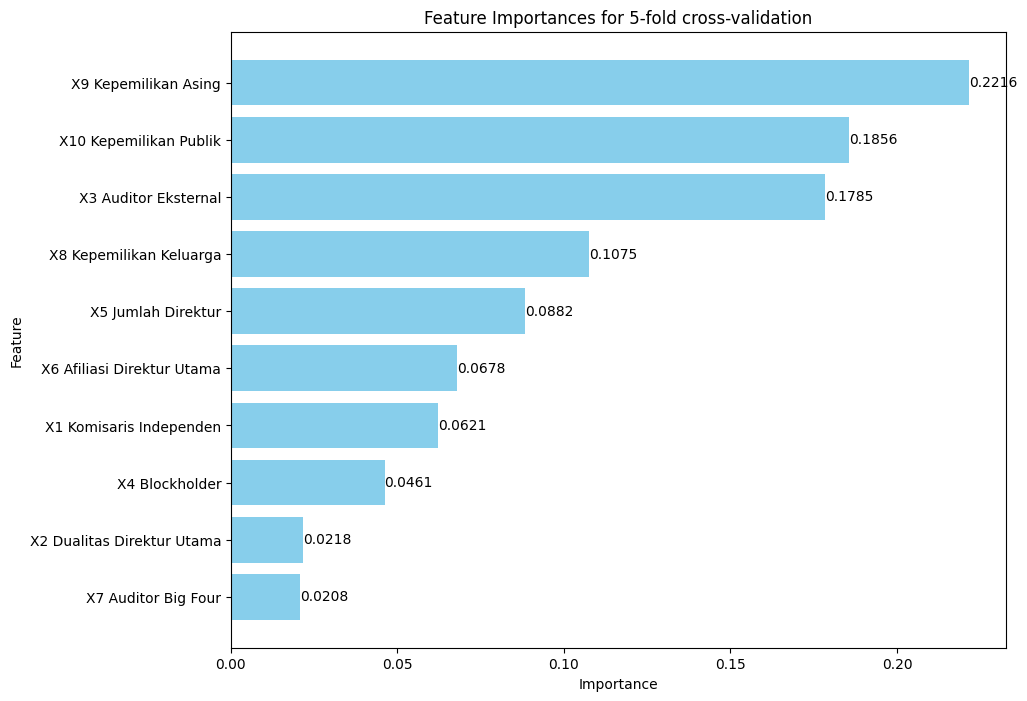


Best parameters found for 10-fold cross-validation: {'oob_score': True, 'n_estimators': 230, 'min_samples_split': 2, 'min_samples_leaf': 9, 'max_samples': 0.8, 'max_depth': 14, 'criterion': 'entropy', 'bootstrap': True}

Metrics for 10-fold cross-validation:
  Fold 1: {'Train Accuracy': 0.7707006369426752, 'Train Precision': 0.7441860465116279, 'Train Recall': 0.8205128205128205, 'Train F1': 0.7804878048780488, 'Train Log Loss': 0.6015704204297176, 'Train ROC AUC': 0.7710159039272964, 'Test Accuracy': 0.5555555555555556, 'Test Precision': 0.42857142857142855, 'Test Recall': 0.42857142857142855, 'Test F1': 0.42857142857142855, 'Test Log Loss': 0.7084277369772648, 'Test ROC AUC': 0.5324675324675324, 'Generalization Error': 0.4444444444444444, 'Mean Tree Correlation': 0.3602334440590418, 'Mean Tree Strength': 1.0, 'Index Test': Index([9, 15, 31, 42, 45, 51, 55, 60, 65, 101, 112, 113, 126, 127, 139, 141,
       145, 156],
      dtype='int64'), 'Test π(x)': array([[0.70635056, 0.29364944],

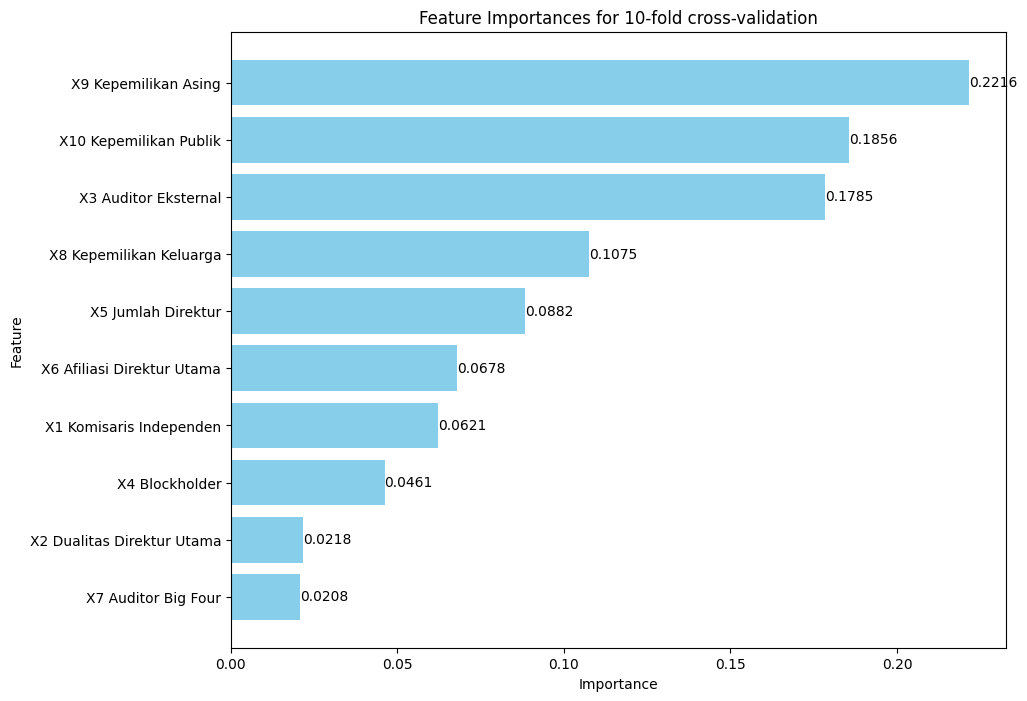

,Train Accuracy,Train Precision,Train Recall,Train F1,Train Log Loss,Train ROC AUC,Test Accuracy,Test Precision,Test Recall,Test F1,...,Test ROC AUC,Generalization Error,Mean Tree Correlation,Mean Tree Strength,Index Test,Test π(x),y_hat,Y_actual,num_fold,fold
0,0.650000,0.635294,0.750000,0.687898,0.638614,0.647059,0.514286,0.375000,0.461538,0.413793,...,0.503497,0.485714,0.482270,1.0,"Index([ 9, 12, 15, 16, 18, 19, 24, 29,...","[[0.5872563285542812, 0.4127436714457187], [0....","[0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, ...","[1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...",5,1
1,0.621429,0.634615,0.492537,0.554622,0.655117,0.616132,0.628571,0.666667,0.555556,0.606061,...,0.630719,0.371429,0.369121,1.0,"Index([ 2, 4, 6, 11, 22, 26, 27, 32,...","[[0.6197987031874508, 0.3802012968125491], [0....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, ...","[0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, ...",5,2
2,0.650000,0.684211,0.557143,0.614173,0.660670,0.650000,0.542857,0.454545,0.333333,0.384615,...,0.516667,0.457143,0.312016,1.0,"Index([ 0, 10, 23, 25, 28, 33, 39, 40,...","[[0.584636009417576, 0.41536399058242396], [0....","[0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, ...","[1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, ...",5,3
3,0.642857,0.630769,0.611940,0.621212,0.641545,0.641587,0.457143,0.461538,0.333333,0.387097,...,0.460784,0.542857,0.444256,1.0,"Index([ 3, 5, 7, 8, 13, 17, 34, 35,...","[[0.6008620671196023, 0.39913793288039773], [0...","[0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, ...",5,4
4,0.685714,0.750000,0.468750,0.576923,0.643529,0.668586,0.400000,0.500000,0.238095,0.322581,...,0.440476,0.600000,0.276040,1.0,"Index([ 1, 14, 20, 21, 37, 48, 50, 52,...","[[0.39040202763341203, 0.6095979723665879], [0...","[1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, ...",5,5
5,0.650000,0.666978,0.576074,0.610966,0.647895,0.644673,0.508571,0.491550,0.384371,0.422829,...,0.510429,0.491429,0.376741,1.0,NaN,NaN,NaN,NaN,5,mean
6,0.770701,0.744186,0.820513,0.780488,0.601570,0.771016,0.555556,0.428571,0.428571,0.428571,...,0.532468,0.444444,0.360233,1.0,"Index([9, 15, 31, 42, 45, 51, 55, 60, 65, 101,...","[[0.7063505644471881, 0.2936494355528118], [0....","[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, ...","[1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...",10,1
7,0.757962,0.730337,0.822785,0.773810,0.594687,0.757546,0.333333,0.250000,0.500000,0.333333,...,0.375000,0.666667,0.341414,1.0,"Index([12, 16, 18, 19, 24, 29, 30, 41, 56, 66,...","[[0.3899550054916619, 0.6100449945083378], [0....","[1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, ...","[0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...",10,2
8,0.802548,0.819444,0.766234,0.791946,0.603926,0.801867,0.444444,0.400000,0.500000,0.444444,...,0.450000,0.555556,0.315809,1.0,"Index([2, 26, 38, 67, 69, 75, 90, 98, 104, 108...","[[0.5160969288193523, 0.48390307118064757], [0...","[0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, ...","[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...",10,3
9,0.777070,0.812500,0.693333,0.748201,0.601523,0.773496,0.388889,0.400000,0.200000,0.266667,...,0.412500,0.611111,0.339581,1.0,"Index([4, 6, 11, 22, 27, 32, 36, 68, 76, 82, 8...","[[0.6043157839391441, 0.3956842160608559], [0....","[0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, ...",10,4


In [ ]:
import matplotlib.pyplot as plt

# Create a DataFrame to summarize metrics for each fold and the mean metrics
summary_df_list = []

for i, num_fold in enumerate(num_folds):
    # Print the best parameters and corresponding scores
    print(f"\nBest parameters found for {num_fold}-fold cross-validation: {best_params}")
    print(f"\nMetrics for {num_fold}-fold cross-validation:")
    fold_metrics = metrics_per_num_fold[i]

    #  # Print accuracy, precision, recall, F1 score, ROC AUC, and log loss for each iteration
    # for i in range(len(results['mean_test_accuracy'])):
    #     print(f"Iteration {i + 1}: Accuracy: {results['mean_test_accuracy'][i]}, Precision: {results['mean_test_precision'][i]}, Recall: {results['mean_test_recall'][i]}, F1 Score: {results['mean_test_f1'][i]}, ROC AUC: {results['mean_test_roc_auc'][i]}, Log Loss: {results['mean_test_log_loss'][i]}")

    # Create a DataFrame for the current fold
    fold_df = pd.DataFrame(fold_metrics)
    fold_df['num_fold'] = num_fold
    fold_df['fold'] = range(1, len(fold_metrics) + 1)
    summary_df_list.append(fold_df)

    # Calculate mean metrics over all folds
    mean_metrics = {}
    for key in fold_metrics[0].keys():
        if isinstance(fold_metrics[0][key], (int, float)):  # Check if the value is numeric
            mean_metrics[key] = np.mean([fold_metric[key] for fold_metric in fold_metrics])

    # Print metrics for each fold
    for fold, metrics in enumerate(fold_metrics, 1):
        print(f"  Fold {fold}: {metrics}")

    print("\nMean metrics over all folds:")
    for metric, mean_value in mean_metrics.items():
        print(f"  {metric}: {mean_value}")

    # Append mean metrics to the DataFrame
    mean_df = pd.DataFrame([mean_metrics])
    mean_df['num_fold'] = num_fold
    mean_df['fold'] = 'mean'
    summary_df_list.append(mean_df)

    # Feature importance
    feature_importances = np.mean([tree.feature_importances_ for tree in best_rf_model.estimators_], axis=0)
    feature_importance_df = pd.DataFrame({'Feature': x.columns, 'Importance': feature_importances})
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

    print("\nFeature Importances:")
    print(feature_importance_df)

    # Plot feature importances
    plt.figure(figsize=(10, 8))
    bars = plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.title(f'Feature Importances for {num_fold}-fold cross-validation')
    plt.gca().invert_yaxis()  # Invert y-axis to have the highest importance on top

    # Add score values to the plot
    for bar in bars:
        plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{bar.get_width():.4f}', va='center')

    plt.show()

# Concatenate all DataFrames to create a final summary DataFrame
final_summary_df = pd.concat(summary_df_list, ignore_index=True)

# Save DataFrame to CSV
final_summary_df.to_csv('final_summary_df.csv', index=False)
final_summary_df

In [ ]:
import matplotlib.pyplot as plt

# Create a DataFrame to summarize metrics for each fold and the mean metrics
summary_num_fold = []

for num_fold in enumerate(num_folds):
    # Print the best parameters and corresponding scores
    print(f"\nBest parameters found for {num_fold}-fold cross-validation: {best_params}")
    print(f"\nMetrics for {num_fold}-fold cross-validation:")
    fold_metrics = metrics_per_num_fold[i]

    #  # Print accuracy, precision, recall, F1 score, ROC AUC, and log loss for each iteration
    # for i in range(len(results['mean_test_accuracy'])):
    #     print(f"Iteration {i + 1}: Accuracy: {results['mean_test_accuracy'][i]}, Precision: {results['mean_test_precision'][i]}, Recall: {results['mean_test_recall'][i]}, F1 Score: {results['mean_test_f1'][i]}, ROC AUC: {results['mean_test_roc_auc'][i]}, Log Loss: {results['mean_test_log_loss'][i]}")

    # Create a DataFrame for the current fold
    fold_df = pd.DataFrame(fold_metrics)
    fold_df['num_fold'] = num_fold
    fold_df['fold'] = range(1, len(fold_metrics) + 1)
    summary_num_fold.append(fold_df)

    # Calculate mean metrics over all folds
    mean_metrics = {}
    for key in fold_metrics[0].keys():
        if isinstance(fold_metrics[0][key], (int, float)):  # Check if the value is numeric
            mean_metrics[key] = np.mean([fold_metric[key] for fold_metric in fold_metrics])

    # Print metrics for each fold
    for fold, metrics in enumerate(fold_metrics, 1):
        print(f"  Fold {fold}: {metrics}")

    print("\nMean metrics over all folds:")
    for metric, mean_value in mean_metrics.items():
        print(f"  {metric}: {mean_value}")

    # Append mean metrics to the DataFrame
    mean_df = pd.DataFrame([mean_metrics])
    mean_df['num_fold'] = num_fold
    mean_df['fold'] = 'mean'
    summary_df_list.append(mean_df)

    # Feature importance
    feature_importances = np.mean([tree.feature_importances_ for tree in best_rf_model.estimators_], axis=0)
    feature_importance_df = pd.DataFrame({'Feature': x.columns, 'Importance': feature_importances})
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

    print("\nFeature Importances:")
    print(feature_importance_df)

    # Plot feature importances
    plt.figure(figsize=(10, 8))
    bars = plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.title(f'Feature Importances for {num_fold}-fold cross-validation')
    plt.gca().invert_yaxis()  # Invert y-axis to have the highest importance on top

    # Add score values to the plot
    for bar in bars:
        plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{bar.get_width():.4f}', va='center')

    plt.show()

# Concatenate all DataFrames to create a final summary DataFrame
final_summary_df = pd.concat(summary_df_list, ignore_index=True)

# Save DataFrame to CSV
final_summary_df.to_csv('final_summary_df.csv', index=False)
final_summary_df


Best parameters found for (0, 5)-fold cross-validation: {'oob_score': True, 'n_estimators': 230, 'min_samples_split': 2, 'min_samples_leaf': 9, 'max_samples': 0.8, 'max_depth': 14, 'criterion': 'entropy', 'bootstrap': True}

Metrics for (0, 5)-fold cross-validation:


ValueError: Length of values (2) does not match length of index (10)

In [ ]:
# Initialize dictionaries to store the best result for each key
best_results = {}
best_indices = {}

# Iterate over the keys
for key in results.keys():
    if key.startswith('mean_test_'):
        # Extract the mean test scores
        scores = results[key]

        # Find the index of the best score
        best_index = np.argmax(scores)

        # Store the best result and its index
        best_results[key] = scores[best_index]
        best_indices[key] = best_index

# Print the best result for each key
for key, value in best_results.items():
    best_param = results['params'][best_indices[key]]
    print(f"Best {key}: {value} using parameters {best_param}")

In [ ]:
# Calculate feature importances
feature_importances = best_rf_model.feature_importances_

# Calculate the median of the feature importances
median_importance = np.median(feature_importances)

# Calculate the mean of the feature importances
mean_importance = np.mean(feature_importances)

# Select features based on median or mean threshold
selected_features_median = x.columns[feature_importances >= median_importance]
selected_features_mean = x.columns[feature_importances >= mean_importance]

print(f"Selected features based on median importance: {selected_features_median}")
print(f"Selected features based on mean importance: {selected_features_mean}")

In [ ]:
median_importance

In [ ]:
mean_importance

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold, RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from xgboost import XGBClassifier
import warnings

# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')

# Assume `x` and `y` are your input features and target variable
# Ensure that x and y are defined here, e.g., from your data

# Initialize lists to store metrics for each fold
metrics_per_fold = []
metrics_per_num_fold = []

# Define the number of folds for both 5-fold and 10-fold cross-validation
num_folds = [5, 10]

# Define the parameter grid for RandomizedSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2]
}

# Convert one-hot encoded target `y` to class labels if necessary
if len(y.shape) > 1 and y.shape[1] > 1:
    y = np.argmax(y.values, axis=1)

# Ensure indices are reset
x = x.reset_index(drop=True)
y = y.reset_index(drop=True)

# Loop over each value of num_folds
for num_fold in num_folds:
    kf = KFold(n_splits=num_fold, shuffle=True, random_state=42)
    fold = 1

    for train_index, test_index in kf.split(x):
        x_train, x_test = x.iloc[train_index], x.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]

       # Define XGBoost model with RandomizedSearchCV
        model_xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
        randomized_search = RandomizedSearchCV(estimator=model_xgb, param_distributions=param_distributions, n_iter=50, scoring='accuracy', n_jobs=-1, random_state=42)

        # Train XGBoost model with randomized search on transformed data
        randomized_search.fit(x_train, y_train)
        best_model = randomized_search.best_estimator_

        # Predict on training set
        train_pred = best_model.predict(x_train)
        train_pred_prob = best_model.predict_proba(x_train)

        # Ensure y_train and y_test are 1D arrays
        y_train = np.ravel(y_train)
        y_test = np.ravel(y_test)

        # Calculate evaluation metrics for training set
        train_accuracy = accuracy_score(y_train, train_pred)
        train_precision = precision_score(y_train, train_pred)
        train_recall = recall_score(y_train, train_pred)
        train_f1 = f1_score(y_train, train_pred)
        train_roc_auc = roc_auc_score(y_train, train_pred_prob[:, 1])

        # Predict on test set
        test_pred = best_model.predict(x_test)
        test_pred_prob = best_model.predict_proba(x_test)

        # Calculate evaluation metrics for test set
        test_accuracy = accuracy_score(y_test, test_pred)
        test_precision = precision_score(y_test, test_pred)
        test_recall = recall_score(y_test, test_pred)
        test_f1 = f1_score(y_test, test_pred)
        test_roc_auc = roc_auc_score(y_test, test_pred_prob[:, 1])

        # Store metrics for this fold
        fold_metrics = {
            "Fold": fold,
            "Num Folds": num_fold,
            "Train Accuracy": train_accuracy,
            "Train Precision": train_precision,
            "Train Recall": train_recall,
            "Train F1": train_f1,
            "Train ROC-AUC": train_roc_auc,
            "Test Accuracy": test_accuracy,
            "Test Precision": test_precision,
            "Test Recall": test_recall,
            "Test F1": test_f1,
            "Test ROC-AUC": test_roc_auc,
            "Best Parameters": randomized_search.best_params_
        }
        metrics_per_fold.append(fold_metrics)

        # Move to the next fold
        fold += 1

    # Print the best model and its parameters
    print(f"Best model for {num_fold}-fold cross-validation:")
    print(f"Best parameters: {randomized_search.best_params_}\n")

    # Calculate mean metrics across all folds for the current number of folds
    mean_metrics = {
        "Num Folds": num_fold,
        "Mean Train Accuracy": np.mean([m["Train Accuracy"] for m in metrics_per_fold if m["Num Folds"] == num_fold]),
        "Mean Train Precision": np.mean([m["Train Precision"] for m in metrics_per_fold if m["Num Folds"] == num_fold]),
        "Mean Train Recall": np.mean([m["Train Recall"] for m in metrics_per_fold if m["Num Folds"] == num_fold]),
        "Mean Train F1": np.mean([m["Train F1"] for m in metrics_per_fold if m["Num Folds"] == num_fold]),
        "Mean Train ROC-AUC": np.mean([m["Train ROC-AUC"] for m in metrics_per_fold if m["Num Folds"] == num_fold]),
        "Mean Test Accuracy": np.mean([m["Test Accuracy"] for m in metrics_per_fold if m["Num Folds"] == num_fold]),
        "Mean Test Precision": np.mean([m["Test Precision"] for m in metrics_per_fold if m["Num Folds"] == num_fold]),
        "Mean Test Recall": np.mean([m["Test Recall"] for m in metrics_per_fold if m["Num Folds"] == num_fold]),
        "Mean Test F1": np.mean([m["Test F1"] for m in metrics_per_fold if m["Num Folds"] == num_fold]),
        "Mean Test ROC-AUC": np.mean([m["Test ROC-AUC"] for m in metrics_per_fold if m["Num Folds"] == num_fold]),
        "Best Parameters": randomized_search.best_params_
    }
    metrics_per_num_fold.append(mean_metrics)

# Convert the results into DataFrames
ori_metrics_df = pd.DataFrame(metrics_per_fold)
ori_metrics_num_fold_df = pd.DataFrame(metrics_per_num_fold)

# Save the metrics DataFrames to CSV files
ori_metrics_df.to_csv('ori_metrics_per_fold.csv', index=False)
ori_metrics_num_fold_df.to_csv('ori_metrics_per_num_fold.csv', index=False)

Best model for 5-fold cross-validation:
Best parameters: {'oob_score': False, 'n_estimators': 10, 'min_samples_split': 2, 'min_samples_leaf': 16, 'max_samples': 0.7000000000000001, 'max_depth': 19, 'criterion': 'entropy', 'bootstrap': True}

Best model for 10-fold cross-validation:
Best parameters: {'oob_score': True, 'n_estimators': 650, 'min_samples_split': 13, 'min_samples_leaf': 11, 'max_samples': 1.0, 'max_depth': 16, 'criterion': 'entropy', 'bootstrap': True}



In [ ]:
ori_metrics_df

,Fold,Num Folds,Train Accuracy,Train Precision,Train Recall,Train F1,Train ROC-AUC,Test Accuracy,Test Precision,Test Recall,Test F1,Test ROC-AUC,Best Parameters
0,1,5,1.000000,1.000000,1.00000,1.000000,1.000000,0.457143,0.285714,0.307692,0.296296,0.402098,"{'oob_score': False, 'n_estimators': 340, 'min..."
1,2,5,1.000000,1.000000,1.00000,1.000000,1.000000,0.542857,0.562500,0.500000,0.529412,0.532680,"{'oob_score': False, 'n_estimators': 770, 'min..."
2,3,5,1.000000,1.000000,1.00000,1.000000,1.000000,0.485714,0.400000,0.400000,0.400000,0.430000,"{'oob_score': False, 'n_estimators': 690, 'min..."
3,4,5,1.000000,1.000000,1.00000,1.000000,1.000000,0.457143,0.461538,0.333333,0.387097,0.385621,"{'oob_score': False, 'n_estimators': 300, 'min..."
4,5,5,0.978571,0.984127,0.96875,0.976378,0.999383,0.600000,0.666667,0.666667,0.666667,0.547619,"{'oob_score': False, 'n_estimators': 10, 'min_..."
5,1,10,1.000000,1.000000,1.00000,1.000000,1.000000,0.277778,0.125000,0.142857,0.133333,0.233766,"{'oob_score': True, 'n_estimators': 590, 'min_..."
6,2,10,1.000000,1.000000,1.00000,1.000000,1.000000,0.388889,0.222222,0.333333,0.266667,0.416667,"{'oob_score': True, 'n_estimators': 730, 'min_..."
7,3,10,1.000000,1.000000,1.00000,1.000000,1.000000,0.444444,0.375000,0.375000,0.375000,0.512500,"{'oob_score': False, 'n_estimators': 150, 'min..."
8,4,10,1.000000,1.000000,1.00000,1.000000,1.000000,0.444444,0.500000,0.300000,0.375000,0.475000,"{'oob_score': False, 'n_estimators': 770, 'min..."
9,5,10,1.000000,1.000000,1.00000,1.000000,1.000000,0.555556,0.555556,0.555556,0.555556,0.543210,"{'oob_score': True, 'n_estimators': 730, 'min_..."


In [ ]:
ori_metrics_num_fold_df

,Num Folds,Mean Train Accuracy,Mean Train Precision,Mean Train Recall,Mean Train F1,Mean Train ROC-AUC,Mean Test Accuracy,Mean Test Precision,Mean Test Recall,Mean Test F1,Mean Test ROC-AUC,Best Parameters
0,5,0.995714,0.996825,0.99375,0.995276,0.999877,0.508571,0.475284,0.441538,0.455894,0.459604,"{'oob_score': False, 'n_estimators': 10, 'min_..."
1,10,1.000000,1.000000,1.00000,1.000000,1.000000,0.452288,0.427843,0.385501,0.399079,0.455095,"{'oob_score': True, 'n_estimators': 650, 'min_..."


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold, RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import warnings

# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')

# Assume `x` and `y` are your input features and target variable
# Ensure that x and y are defined here, e.g., from your data

# Initialize lists to store metrics for each fold
metrics_per_fold = []
metrics_per_num_fold = []

# Define the number of folds for both 5-fold and 10-fold cross-validation
num_folds = [5, 10]

# Define the parameter grid for RandomizedSearchCV
param_distributions = {
    'C': [0.1, 1, 10, 100, 1000],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}

# Convert one-hot encoded target `y` to class labels if necessary
if len(y.shape) > 1 and y.shape[1] > 1:
    y = np.argmax(y.values, axis=1)

# Ensure indices are reset
x = x.reset_index(drop=True)
y = y.reset_index(drop=True)

# Loop over each value of num_folds
for num_fold in num_folds:
    kf = KFold(n_splits=num_fold, shuffle=True, random_state=42)
    fold = 1

    for train_index, test_index in kf.split(x):
        x_train, x_test = x.iloc[train_index], x.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Define SVM model with RandomizedSearchCV
        model_svm = SVC(probability=True)
        randomized_search = RandomizedSearchCV(estimator=model_svm, param_distributions=param_distributions, n_iter=50, scoring='accuracy', n_jobs=-1, random_state=42)

        # Train SVM model with randomized search on transformed data
        randomized_search.fit(x_train, y_train)
        best_model = randomized_search.best_estimator_

        # Predict on training set
        train_pred = best_model.predict(x_train)
        train_pred_prob = best_model.predict_proba(x_train)

        # Ensure y_train and y_test are 1D arrays
        y_train = np.ravel(y_train)
        y_test = np.ravel(y_test)

        # Calculate evaluation metrics for training set
        train_accuracy = accuracy_score(y_train, train_pred)
        train_precision = precision_score(y_train, train_pred)
        train_recall = recall_score(y_train, train_pred)
        train_f1 = f1_score(y_train, train_pred)
        train_roc_auc = roc_auc_score(y_train, train_pred_prob[:, 1])

        # Predict on test set
        test_pred = best_model.predict(x_test)
        test_pred_prob = best_model.predict_proba(x_test)

        # Calculate evaluation metrics for test set
        test_accuracy = accuracy_score(y_test, test_pred)
        test_precision = precision_score(y_test, test_pred)
        test_recall = recall_score(y_test, test_pred)
        test_f1 = f1_score(y_test, test_pred)
        test_roc_auc = roc_auc_score(y_test, test_pred_prob[:, 1])

        # Store metrics for this fold
        fold_metrics = {
            "Fold": fold,
            "Num Folds": num_fold,
            "Train Accuracy": train_accuracy,
            "Train Precision": train_precision,
            "Train Recall": train_recall,
            "Train F1": train_f1,
            "Train ROC-AUC": train_roc_auc,
            "Test Accuracy": test_accuracy,
            "Test Precision": test_precision,
            "Test Recall": test_recall,
            "Test F1": test_f1,
            "Test ROC-AUC": test_roc_auc,
            "Best Parameters": randomized_search.best_params_
        }
        metrics_per_fold.append(fold_metrics)

        # Move to the next fold
        fold += 1

    # Print the best model and its parameters
    print(f"Best model for {num_fold}-fold cross-validation:")
    print(f"Best parameters: {randomized_search.best_params_}\n")

    # Calculate mean metrics across all folds for the current number of folds
    mean_metrics = {
        "Num Folds": num_fold,
        "Mean Train Accuracy": np.mean([m["Train Accuracy"] for m in metrics_per_fold if m["Num Folds"] == num_fold]),
        "Mean Train Precision": np.mean([m["Train Precision"] for m in metrics_per_fold if m["Num Folds"] == num_fold]),
        "Mean Train Recall": np.mean([m["Train Recall"] for m in metrics_per_fold if m["Num Folds"] == num_fold]),
        "Mean Train F1": np.mean([m["Train F1"] for m in metrics_per_fold if m["Num Folds"] == num_fold]),
        "Mean Train ROC-AUC": np.mean([m["Train ROC-AUC"] for m in metrics_per_fold if m["Num Folds"] == num_fold]),
        "Mean Test Accuracy": np.mean([m["Test Accuracy"] for m in metrics_per_fold if m["Num Folds"] == num_fold]),
        "Mean Test Precision": np.mean([m["Test Precision"] for m in metrics_per_fold if m["Num Folds"] == num_fold]),
        "Mean Test Recall": np.mean([m["Test Recall"] for m in metrics_per_fold if m["Num Folds"] == num_fold]),
        "Mean Test F1": np.mean([m["Test F1"] for m in metrics_per_fold if m["Num Folds"] == num_fold]),
        "Mean Test ROC-AUC": np.mean([m["Test ROC-AUC"] for m in metrics_per_fold if m["Num Folds"] == num_fold]),
        "Best Parameters": randomized_search.best_params_
    }
    metrics_per_num_fold.append(mean_metrics)

# Convert the results into DataFrames
ori_metrics_df = pd.DataFrame(metrics_per_fold)
ori_metrics_num_fold_df = pd.DataFrame(metrics_per_num_fold)

# Save the metrics DataFrames to CSV files
ori_metrics_df.to_csv('ori_metrics_per_fold.csv', index=False)
ori_metrics_num_fold_df.to_csv('ori_metrics_per_num_fold.csv', index=False)

Best model for 5-fold cross-validation:
Best parameters: {'kernel': 'sigmoid', 'gamma': 0.1, 'C': 1}

Best model for 10-fold cross-validation:
Best parameters: {'kernel': 'sigmoid', 'gamma': 1, 'C': 1000}



In [ ]:
ori_metrics_df

,Fold,Num Folds,Train Accuracy,Train Precision,Train Recall,Train F1,Train ROC-AUC,Test Accuracy,Test Precision,Test Recall,Test F1,Test ROC-AUC,Best Parameters
0,1,5,0.621429,0.588785,0.875000,0.703911,0.654412,0.400000,0.318182,0.538462,0.400000,0.482517,"{'kernel': 'poly', 'gamma': 0.1, 'C': 10}"
1,2,5,0.557143,0.537313,0.537313,0.537313,0.418728,0.571429,0.578947,0.611111,0.594595,0.405229,"{'kernel': 'sigmoid', 'gamma': 1, 'C': 1000}"
2,3,5,0.557143,0.557143,0.557143,0.557143,0.450714,0.571429,0.500000,0.533333,0.516129,0.296667,"{'kernel': 'sigmoid', 'gamma': 1, 'C': 1000}"
3,4,5,0.607143,0.636364,0.417910,0.504505,0.618074,0.342857,0.222222,0.111111,0.148148,0.359477,"{'kernel': 'sigmoid', 'gamma': 0.1, 'C': 10}"
4,5,5,0.550000,1.000000,0.015625,0.030769,0.374589,0.400000,0.000000,0.000000,0.000000,0.489796,"{'kernel': 'sigmoid', 'gamma': 0.1, 'C': 1}"
5,1,10,0.611465,0.580952,0.782051,0.666667,0.698475,0.444444,0.333333,0.428571,0.375000,0.311688,"{'kernel': 'poly', 'gamma': 0.1, 'C': 100}"
6,2,10,0.662420,0.641304,0.746835,0.690058,0.309883,0.333333,0.250000,0.500000,0.333333,0.666667,"{'kernel': 'rbf', 'gamma': 0.01, 'C': 1000}"
7,3,10,0.605096,0.600000,0.584416,0.592105,0.645292,0.555556,0.500000,0.750000,0.600000,0.587500,"{'kernel': 'linear', 'gamma': 0.0001, 'C': 100}"
8,4,10,0.585987,0.550000,0.733333,0.628571,0.360325,0.611111,0.615385,0.800000,0.695652,0.562500,"{'kernel': 'poly', 'gamma': 0.1, 'C': 10}"
9,5,10,0.566879,0.552632,0.552632,0.552632,0.432424,0.555556,0.555556,0.555556,0.555556,0.358025,"{'kernel': 'sigmoid', 'gamma': 1, 'C': 1000}"


In [ ]:
ori_metrics_num_fold_df

,Num Folds,Mean Train Accuracy,Mean Train Precision,Mean Train Recall,Mean Train F1,Mean Train ROC-AUC,Mean Test Accuracy,Mean Test Precision,Mean Test Recall,Mean Test F1,Mean Test ROC-AUC,Best Parameters
0,5,0.578571,0.663921,0.480598,0.466728,0.503303,0.457143,0.323870,0.358803,0.331774,0.406737,"{'kernel': 'sigmoid', 'gamma': 0.1, 'C': 1}"
1,10,0.592425,0.586470,0.591859,0.558669,0.469632,0.502941,0.515983,0.526634,0.480164,0.478705,"{'kernel': 'sigmoid', 'gamma': 1, 'C': 1000}"


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold, RandomizedSearchCV
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import warnings

# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')

# Assume `x` and `y` are your input features and target variable
# Ensure that x and y are defined here, e.g., from your data

# Initialize lists to store metrics for each fold
metrics_per_fold = []
metrics_per_num_fold = []

# Define the number of folds for both 5-fold and 10-fold cross-validation
num_folds = [5, 10]

# Define the parameter grid for RandomizedSearchCV
param_distributions = {
    'n_estimators': [10, 50, 100, 200, 500],
    'max_samples': [0.5, 0.7, 1.0],
    'max_features': [0.5, 0.7, 1.0],
    'bootstrap': [True, False],
    'bootstrap_features': [True, False]
}

# Convert one-hot encoded target `y` to class labels if necessary
if len(y.shape) > 1 and y.shape[1] > 1:
    y = np.argmax(y.values, axis=1)

# Ensure indices are reset
x = x.reset_index(drop=True)
y = y.reset_index(drop=True)

# Loop over each value of num_folds
for num_fold in num_folds:
    kf = KFold(n_splits=num_fold, shuffle=True, random_state=42)
    fold = 1

    for train_index, test_index in kf.split(x):
        x_train, x_test = x.iloc[train_index], x.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Define Bagging model with RandomizedSearchCV
        base_estimator = DecisionTreeClassifier()
        model_bagging = BaggingClassifier(base_estimator=base_estimator)
        randomized_search = RandomizedSearchCV(estimator=model_bagging, param_distributions=param_distributions, n_iter=50, scoring='accuracy', n_jobs=-1, random_state=42)

        # Train Bagging model with randomized search on transformed data
        randomized_search.fit(x_train, y_train)
        best_model = randomized_search.best_estimator_

        # Predict on training set
        train_pred = best_model.predict(x_train)
        train_pred_prob = best_model.predict_proba(x_train)

        # Ensure y_train and y_test are 1D arrays
        y_train = np.ravel(y_train)
        y_test = np.ravel(y_test)

        # Calculate evaluation metrics for training set
        train_accuracy = accuracy_score(y_train, train_pred)
        train_precision = precision_score(y_train, train_pred)
        train_recall = recall_score(y_train, train_pred)
        train_f1 = f1_score(y_train, train_pred)
        train_roc_auc = roc_auc_score(y_train, train_pred_prob[:, 1])

        # Predict on test set
        test_pred = best_model.predict(x_test)
        test_pred_prob = best_model.predict_proba(x_test)

        # Calculate evaluation metrics for test set
        test_accuracy = accuracy_score(y_test, test_pred)
        test_precision = precision_score(y_test, test_pred)
        test_recall = recall_score(y_test, test_pred)
        test_f1 = f1_score(y_test, test_pred)
        test_roc_auc = roc_auc_score(y_test, test_pred_prob[:, 1])

        # Store metrics for this fold
        fold_metrics = {
            "Fold": fold,
            "Num Folds": num_fold,
            "Train Accuracy": train_accuracy,
            "Train Precision": train_precision,
            "Train Recall": train_recall,
            "Train F1": train_f1,
            "Train ROC-AUC": train_roc_auc,
            "Test Accuracy": test_accuracy,
            "Test Precision": test_precision,
            "Test Recall": test_recall,
            "Test F1": test_f1,
            "Test ROC-AUC": test_roc_auc,
            "Best Parameters": randomized_search.best_params_
        }
        metrics_per_fold.append(fold_metrics)

        # Move to the next fold
        fold += 1

    # Print the best model and its parameters
    print(f"Best model for {num_fold}-fold cross-validation:")
    print(f"Best parameters: {randomized_search.best_params_}\n")

    # Calculate mean metrics across all folds for the current number of folds
    mean_metrics = {
        "Num Folds": num_fold,
        "Mean Train Accuracy": np.mean([m["Train Accuracy"] for m in metrics_per_fold if m["Num Folds"] == num_fold]),
        "Mean Train Precision": np.mean([m["Train Precision"] for m in metrics_per_fold if m["Num Folds"] == num_fold]),
        "Mean Train Recall": np.mean([m["Train Recall"] for m in metrics_per_fold if m["Num Folds"] == num_fold]),
        "Mean Train F1": np.mean([m["Train F1"] for m in metrics_per_fold if m["Num Folds"] == num_fold]),
        "Mean Train ROC-AUC": np.mean([m["Train ROC-AUC"] for m in metrics_per_fold if m["Num Folds"] == num_fold]),
        "Mean Test Accuracy": np.mean([m["Test Accuracy"] for m in metrics_per_fold if m["Num Folds"] == num_fold]),
        "Mean Test Precision": np.mean([m["Test Precision"] for m in metrics_per_fold if m["Num Folds"] == num_fold]),
        "Mean Test Recall": np.mean([m["Test Recall"] for m in metrics_per_fold if m["Num Folds"] == num_fold]),
        "Mean Test F1": np.mean([m["Test F1"] for m in metrics_per_fold if m["Num Folds"] == num_fold]),
        "Mean Test ROC-AUC": np.mean([m["Test ROC-AUC"] for m in metrics_per_fold if m["Num Folds"] == num_fold]),
        "Best Parameters": randomized_search.best_params_
    }
    metrics_per_num_fold.append(mean_metrics)

# Convert the results into DataFrames
ori_metrics_df = pd.DataFrame(metrics_per_fold)
ori_metrics_num_fold_df = pd.DataFrame(metrics_per_num_fold)

# Save the metrics DataFrames to CSV files
ori_metrics_df.to_csv('ori_metrics_per_fold.csv', index=False)
ori_metrics_num_fold_df.to_csv('ori_metrics_per_num_fold.csv', index=False)

Best model for 5-fold cross-validation:
Best parameters: {'n_estimators': 10, 'max_samples': 1.0, 'max_features': 0.5, 'bootstrap_features': False, 'bootstrap': False}

Best model for 10-fold cross-validation:
Best parameters: {'n_estimators': 10, 'max_samples': 0.7, 'max_features': 0.5, 'bootstrap_features': False, 'bootstrap': False}



In [ ]:
ori_metrics_df

,Fold,Num Folds,Train Accuracy,Train Precision,Train Recall,Train F1,Train ROC-AUC,Test Accuracy,Test Precision,Test Recall,Test F1,Test ROC-AUC,Best Parameters
0,1,5,1.000000,1.000000,1.000000,1.000000,1.000000,0.542857,0.384615,0.384615,0.384615,0.533217,"{'n_estimators': 10, 'max_samples': 1.0, 'max_..."
1,2,5,0.971429,0.984615,0.955224,0.969697,0.996933,0.485714,0.500000,0.444444,0.470588,0.539216,"{'n_estimators': 200, 'max_samples': 0.5, 'max..."
2,3,5,0.992857,1.000000,0.985714,0.992806,0.999184,0.542857,0.466667,0.466667,0.466667,0.563333,"{'n_estimators': 10, 'max_samples': 0.7, 'max_..."
3,4,5,0.935714,0.939394,0.925373,0.932331,0.990697,0.457143,0.466667,0.388889,0.424242,0.449346,"{'n_estimators': 50, 'max_samples': 0.5, 'max_..."
4,5,5,1.000000,1.000000,1.000000,1.000000,1.000000,0.600000,0.705882,0.571429,0.631579,0.552721,"{'n_estimators': 10, 'max_samples': 1.0, 'max_..."
5,1,10,0.917197,0.922078,0.910256,0.916129,0.978984,0.444444,0.200000,0.142857,0.166667,0.480519,"{'n_estimators': 10, 'max_samples': 0.5, 'max_..."
6,2,10,0.891720,0.897436,0.886076,0.891720,0.970221,0.611111,0.444444,0.666667,0.533333,0.548611,"{'n_estimators': 10, 'max_samples': 0.5, 'max_..."
7,3,10,0.891720,0.916667,0.857143,0.885906,0.960633,0.388889,0.363636,0.500000,0.421053,0.475000,"{'n_estimators': 10, 'max_samples': 0.5, 'max_..."
8,4,10,0.853503,0.906250,0.773333,0.834532,0.942927,0.500000,0.571429,0.400000,0.470588,0.437500,"{'n_estimators': 10, 'max_samples': 0.5, 'max_..."
9,5,10,1.000000,1.000000,1.000000,1.000000,1.000000,0.555556,0.571429,0.444444,0.500000,0.586420,"{'n_estimators': 50, 'max_samples': 1.0, 'max_..."


In [ ]:
ori_metrics_num_fold_df

,Num Folds,Mean Train Accuracy,Mean Train Precision,Mean Train Recall,Mean Train F1,Mean Train ROC-AUC,Mean Test Accuracy,Mean Test Precision,Mean Test Recall,Mean Test F1,Mean Test ROC-AUC,Best Parameters
0,5,0.980000,0.984802,0.973262,0.978967,0.997363,0.525714,0.504766,0.451209,0.475538,0.527567,"{'n_estimators': 10, 'max_samples': 1.0, 'max_..."
1,10,0.930098,0.950299,0.902936,0.925388,0.978061,0.497059,0.481760,0.413153,0.432188,0.501252,"{'n_estimators': 10, 'max_samples': 0.7, 'max_..."


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.base import clone
import warnings

# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')

# Assume `x` and `y` are your input features and target variable
# Ensure that x and y are defined here, e.g., from your data

# Initialize lists to store metrics for each fold
metrics_per_fold = []
metrics_per_num_fold = []

# Define the number of folds for both 5-fold and 10-fold cross-validation
num_folds = [5, 10]

# Define base models
base_models = [
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    SVC(probability=True)
]

# Define meta-learner
meta_learner = LogisticRegression()

# Convert one-hot encoded target `y` to class labels if necessary
if len(y.shape) > 1 and y.shape[1] > 1:
    y = np.argmax(y.values, axis=1)

# Ensure indices are reset
x = x.reset_index(drop=True)
y = y.reset_index(drop=True)

# Loop over each value of num_folds
for num_fold in num_folds:
    kf = KFold(n_splits=num_fold, shuffle=True, random_state=42)
    fold = 1

    for train_index, test_index in kf.split(x):
        x_train, x_test = x.iloc[train_index], x.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Initialize lists to store base models predictions
        base_models_train_pred = []
        base_models_test_pred = []

        # Train base models
        for base_model in base_models:
            model = clone(base_model)
            model.fit(x_train, y_train)
            base_models_train_pred.append(model.predict_proba(x_train))
            base_models_test_pred.append(model.predict_proba(x_test))

        # Stack base models predictions
        stacked_train_pred = np.column_stack(base_models_train_pred)
        stacked_test_pred = np.column_stack(base_models_test_pred)

        # Train meta-learner
        meta_learner.fit(stacked_train_pred, y_train)

        # Predict on training set
        train_pred_prob = meta_learner.predict_proba(stacked_train_pred)
        train_pred = np.argmax(train_pred_prob, axis=1)

        # Predict on test set
        test_pred_prob = meta_learner.predict_proba(stacked_test_pred)
        test_pred = np.argmax(test_pred_prob, axis=1)

        # Calculate evaluation metrics for training set
        train_accuracy = accuracy_score(y_train, train_pred)
        train_precision = precision_score(y_train, train_pred, average='weighted')
        train_recall = recall_score(y_train, train_pred, average='weighted')
        train_f1 = f1_score(y_train, train_pred, average='weighted')# Convert one-hot encoded target `y` to class labels
        # Calculate evaluation metrics for training set
        # train_roc_auc = roc_auc_score(y_train, train_pred_prob, multi_class='ovr')


        # Calculate evaluation metrics for test set
        test_accuracy = accuracy_score(y_test, test_pred)
        test_precision = precision_score(y_test, test_pred, average='weighted')
        test_recall = recall_score(y_test, test_pred, average='weighted')
        test_f1 = f1_score(y_test, test_pred, average='weighted')
        # test_roc_auc = roc_auc_score(y_test, test_pred_prob, multi_class='ovr')

        # Store metrics for this fold
        fold_metrics = {
            "Fold": fold,
            "Num Folds": num_fold,
            "Train Accuracy": train_accuracy,
            "Train Precision": train_precision,
            "Train Recall": train_recall,
            "Train F1": train_f1,
            "Train ROC-AUC": train_roc_auc,
            "Test Accuracy": test_accuracy,
            "Test Precision": test_precision,
            "Test Recall": test_recall,
            "Test F1": test_f1,
            "Test ROC-AUC": test_roc_auc
        }
        metrics_per_fold.append(fold_metrics)

        # Move to the next fold
        fold += 1

    # Calculate mean metrics across all folds for the current number of folds
    mean_metrics = {
        "Num Folds": num_fold,
        "Mean Train Accuracy": np.mean([m["Train Accuracy"] for m in metrics_per_fold if m["Num Folds"] == num_fold]),
        "Mean Train Precision": np.mean([m["Train Precision"] for m in metrics_per_fold if m["Num Folds"] == num_fold]),
        "Mean Train Recall": np.mean([m["Train Recall"] for m in metrics_per_fold if m["Num Folds"] == num_fold]),
        "Mean Train F1": np.mean([m["Train F1"] for m in metrics_per_fold if m["Num Folds"] == num_fold]),
        "Mean Train ROC-AUC": np.mean([m["Train ROC-AUC"] for m in metrics_per_fold if m["Num Folds"] == num_fold]),
        "Mean Test Accuracy": np.mean([m["Test Accuracy"] for m in metrics_per_fold if m["Num Folds"] == num_fold]),
        "Mean Test Precision": np.mean([m["Test Precision"] for m in metrics_per_fold if m["Num Folds"] == num_fold]),
        "Mean Test Recall": np.mean([m["Test Recall"] for m in metrics_per_fold if m["Num Folds"] == num_fold]),
        "Mean Test F1": np.mean([m["Test F1"] for m in metrics_per_fold if m["Num Folds"] == num_fold]),
        "Mean Test ROC-AUC": np.mean([m["Test ROC-AUC"] for m in metrics_per_fold if m["Num Folds"] == num_fold])
    }
    metrics_per_num_fold.append(mean_metrics)

# Convert the results into DataFrames
stacked_metrics_df = pd.DataFrame(metrics_per_fold)
stacked_metrics_num_fold_df = pd.DataFrame(metrics_per_num_fold)

# Save the metrics DataFrames to CSV files
stacked_metrics_df.to_csv('stacked_metrics_per_fold.csv', index=False)
stacked_metrics_num_fold_df.to_csv('stacked_metrics_per_num_fold.csv', index=False)

In [ ]:
stacked_metrics_df

,Fold,Num Folds,Train Accuracy,Train Precision,Train Recall,Train F1,Train ROC-AUC,Test Accuracy,Test Precision,Test Recall,Test F1,Test ROC-AUC
0,1,5,1.0,1.0,1.0,1.0,0.999036,0.457143,0.465306,0.457143,0.460883,0.628571
1,2,5,1.0,1.0,1.0,1.0,0.999036,0.485714,0.488435,0.485714,0.480639,0.628571
2,3,5,1.0,1.0,1.0,1.0,0.999036,0.571429,0.575188,0.571429,0.572847,0.628571
3,4,5,1.0,1.0,1.0,1.0,0.999036,0.514286,0.517143,0.514286,0.511899,0.628571
4,5,5,1.0,1.0,1.0,1.0,0.999036,0.571429,0.566434,0.571429,0.568475,0.628571
5,1,10,1.0,1.0,1.0,1.0,0.999036,0.444444,0.444444,0.444444,0.444444,0.628571
6,2,10,1.0,1.0,1.0,1.0,0.999036,0.500000,0.597403,0.500000,0.507740,0.628571
7,3,10,1.0,1.0,1.0,1.0,0.999036,0.500000,0.519481,0.500000,0.495356,0.628571
8,4,10,1.0,1.0,1.0,1.0,0.999036,0.444444,0.468254,0.444444,0.401154,0.628571
9,5,10,1.0,1.0,1.0,1.0,0.999036,0.500000,0.500000,0.500000,0.498452,0.628571


In [ ]:
stacked_metrics_num_fold_df

,Num Folds,Mean Train Accuracy,Mean Train Precision,Mean Train Recall,Mean Train F1,Mean Train ROC-AUC,Mean Test Accuracy,Mean Test Precision,Mean Test Recall,Mean Test F1,Mean Test ROC-AUC
0,5,1.0,1.0,1.0,1.0,0.999036,0.520000,0.522501,0.520000,0.518949,0.628571
1,10,1.0,1.0,1.0,1.0,0.999036,0.485948,0.499763,0.485948,0.475665,0.628571


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import warnings

# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')

# Assume `x` and `y` are your input features and target variable
# Ensure that x and y are defined here, e.g., from your data

# Initialize lists to store metrics for each fold
metrics_per_fold = []
metrics_per_num_fold = []

# Define the number of folds for both 5-fold and 10-fold cross-validation
num_folds = [5, 10]

# Define base models
base_models = [
    ('rf', RandomForestClassifier()),
    ('gb', GradientBoostingClassifier()),
    ('svc', SVC(probability=True))
]

# Define voting classifier
voting_classifier = VotingClassifier(estimators=base_models, voting='soft')

# Convert one-hot encoded target `y` to class labels if necessary
if len(y.shape) > 1 and y.shape[1] > 1:
    y = np.argmax(y.values, axis=1)

# Ensure indices are reset
x = x.reset_index(drop=True)
y = y.reset_index(drop=True)

# Loop over each value of num_folds
for num_fold in num_folds:
    kf = KFold(n_splits=num_fold, shuffle=True, random_state=42)
    fold = 1

    for train_index, test_index in kf.split(x):
        x_train, x_test = x.iloc[train_index], x.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Train voting classifier
        voting_classifier.fit(x_train, y_train)

        # Predict on training set
        train_pred_prob = voting_classifier.predict_proba(x_train)
        train_pred = np.argmax(train_pred_prob, axis=1)

        # Predict on test set
        test_pred_prob = voting_classifier.predict_proba(x_test)
        test_pred = np.argmax(test_pred_prob, axis=1)

        # Calculate evaluation metrics for training set
        train_accuracy = accuracy_score(y_train, train_pred)
        train_precision = precision_score(y_train, train_pred, average='weighted')
        train_recall = recall_score(y_train, train_pred, average='weighted')
        train_f1 = f1_score(y_train, train_pred, average='weighted')
        # train_roc_auc = roc_auc_score(y_train, train_pred_prob, multi_class='ovr')

        # Calculate evaluation metrics for test set
        test_accuracy = accuracy_score(y_test, test_pred)
        test_precision = precision_score(y_test, test_pred, average='weighted')
        test_recall = recall_score(y_test, test_pred, average='weighted')
        test_f1 = f1_score(y_test, test_pred, average='weighted')
        # test_roc_auc = roc_auc_score(y_test, test_pred_prob, multi_class='ovr')

        # Store metrics for this fold
        fold_metrics = {
            "Fold": fold,
            "Num Folds": num_fold,
            "Train Accuracy": train_accuracy,
            "Train Precision": train_precision,
            "Train Recall": train_recall,
            "Train F1": train_f1,
            "Train ROC-AUC": train_roc_auc,
            "Test Accuracy": test_accuracy,
            "Test Precision": test_precision,
            "Test Recall": test_recall,
            "Test F1": test_f1,
            "Test ROC-AUC": test_roc_auc
        }
        metrics_per_fold.append(fold_metrics)

        # Move to the next fold
        fold += 1

    # Calculate mean metrics across all folds for the current number of folds
    mean_metrics = {
        "Num Folds": num_fold,
        "Mean Train Accuracy": np.mean([m["Train Accuracy"] for m in metrics_per_fold if m["Num Folds"] == num_fold]),
        "Mean Train Precision": np.mean([m["Train Precision"] for m in metrics_per_fold if m["Num Folds"] == num_fold]),
        "Mean Train Recall": np.mean([m["Train Recall"] for m in metrics_per_fold if m["Num Folds"] == num_fold]),
        "Mean Train F1": np.mean([m["Train F1"] for m in metrics_per_fold if m["Num Folds"] == num_fold]),
        "Mean Train ROC-AUC": np.mean([m["Train ROC-AUC"] for m in metrics_per_fold if m["Num Folds"] == num_fold]),
        "Mean Test Accuracy": np.mean([m["Test Accuracy"] for m in metrics_per_fold if m["Num Folds"] == num_fold]),
        "Mean Test Precision": np.mean([m["Test Precision"] for m in metrics_per_fold if m["Num Folds"] == num_fold]),
        "Mean Test Recall": np.mean([m["Test Recall"] for m in metrics_per_fold if m["Num Folds"] == num_fold]),
        "Mean Test F1": np.mean([m["Test F1"] for m in metrics_per_fold if m["Num Folds"] == num_fold]),
        "Mean Test ROC-AUC": np.mean([m["Test ROC-AUC"] for m in metrics_per_fold if m["Num Folds"] == num_fold])
    }
    metrics_per_num_fold.append(mean_metrics)

# Convert the results into DataFrames
voting_metrics_df = pd.DataFrame(metrics_per_fold)
voting_metrics_num_fold_df = pd.DataFrame(metrics_per_num_fold)

# Save the metrics DataFrames to CSV files
voting_metrics_df.to_csv('voting_metrics_per_fold.csv', index=False)
voting_metrics_num_fold_df.to_csv('voting_metrics_per_num_fold.csv', index=False)

In [ ]:
voting_metrics_df

,Fold,Num Folds,Train Accuracy,Train Precision,Train Recall,Train F1,Train ROC-AUC,Test Accuracy,Test Precision,Test Recall,Test F1,Test ROC-AUC
0,1,5,1.0,1.0,1.0,1.0,0.999036,0.428571,0.444762,0.428571,0.435374,0.628571
1,2,5,1.0,1.0,1.0,1.0,0.999036,0.514286,0.523377,0.514286,0.497128,0.628571
2,3,5,1.0,1.0,1.0,1.0,0.999036,0.457143,0.461466,0.457143,0.458939,0.628571
3,4,5,1.0,1.0,1.0,1.0,0.999036,0.457143,0.458142,0.457143,0.448163,0.628571
4,5,5,1.0,1.0,1.0,1.0,0.999036,0.542857,0.542857,0.542857,0.542857,0.628571
5,1,10,1.0,1.0,1.0,1.0,0.999036,0.444444,0.444444,0.444444,0.444444,0.628571
6,2,10,1.0,1.0,1.0,1.0,0.999036,0.500000,0.597403,0.500000,0.507740,0.628571
7,3,10,1.0,1.0,1.0,1.0,0.999036,0.388889,0.395062,0.388889,0.390781,0.628571
8,4,10,1.0,1.0,1.0,1.0,0.999036,0.388889,0.393162,0.388889,0.359788,0.628571
9,5,10,1.0,1.0,1.0,1.0,0.999036,0.500000,0.500000,0.500000,0.498452,0.628571


In [ ]:
voting_metrics_num_fold_df

,Num Folds,Mean Train Accuracy,Mean Train Precision,Mean Train Recall,Mean Train F1,Mean Train ROC-AUC,Mean Test Accuracy,Mean Test Precision,Mean Test Recall,Mean Test F1,Mean Test ROC-AUC
0,5,1.0,1.0,1.0,1.0,0.999036,0.480000,0.486121,0.480000,0.476492,0.628571
1,10,1.0,1.0,1.0,1.0,0.999036,0.469281,0.481233,0.469281,0.465194,0.628571
